# Home Credit Default Risk - EDA and Data Preparation

In [1]:
import polars as pl
import pandas as pd
import polars.selectors as cs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sweetviz
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

from function import missing_values_table, plot_bar, plot_bar_xticks, plot_hist, plot_distribution_comp, plot_horizontal_bar,reduce_memory_usage_pl, outlier_check, aggregate_and_remove, remove_outlier

In [2]:
application_test = pl.read_csv('../data/application_test.csv')
application_train = pl.read_csv('../data/application_train.csv')
beaureau_balance = pl.read_csv('../data/bureau_balance.csv')
bureau = pl.read_csv('../data/bureau.csv')
credit_card_balance = pl.read_csv('../data/credit_card_balance.csv')
installments_payments = pl.read_csv('../data/installments_payments.csv')
pos_cash_balance = pl.read_csv('../data/POS_CASH_balance.csv')
previous_application = pl.read_csv('../data/previous_application.csv')

In [3]:
application_train = reduce_memory_usage_pl(application_train, 'application_train')
application_test = reduce_memory_usage_pl(application_test, 'application_test')
beaureau_balance = reduce_memory_usage_pl(beaureau_balance, 'beaureau_balance')
bureau = reduce_memory_usage_pl(bureau, 'bureau')
credit_card_balance = reduce_memory_usage_pl(credit_card_balance, 'credit_card_balance')
installments_payments = reduce_memory_usage_pl(installments_payments, 'installments_payments')
pos_cash_balance = reduce_memory_usage_pl(pos_cash_balance, 'pos_cash_balance')
previous_application = reduce_memory_usage_pl(previous_application, 'previous_application')

Memory usage of dataframe application_train is 327.45 MB
Memory usage of dataframe application_train became 111.85 MB
Memory usage of dataframe application_test is 51.5 MB
Memory usage of dataframe application_test became 17.67 MB
Memory usage of dataframe beaureau_balance is 650.88 MB
Memory usage of dataframe beaureau_balance became 234.32 MB
Memory usage of dataframe bureau is 275.19 MB
Memory usage of dataframe bureau became 101.88 MB
Memory usage of dataframe credit_card_balance is 700.35 MB
Memory usage of dataframe credit_card_balance became 308.1 MB
Memory usage of dataframe installments_payments is 833.65 MB
Memory usage of dataframe installments_payments became 392.5 MB
Memory usage of dataframe pos_cash_balance is 672.27 MB
Memory usage of dataframe pos_cash_balance became 240.84 MB
Memory usage of dataframe previous_application is 674.6 MB
Memory usage of dataframe previous_application became 226.19 MB


## EDA and Data Cleaning

### bureau related

In [4]:
print('beaureau_balance shape: ', beaureau_balance.shape)
print('bureau shape: ', bureau.shape)

beaureau_balance shape:  (27299925, 3)
bureau shape:  (1716428, 17)


In [5]:
print(f'Beaureau balance duplicated values: {beaureau_balance.is_duplicated().sum()}')
print(f'Bureau duplicated values: {bureau.is_duplicated().sum()}')

Beaureau balance duplicated values: 0
Bureau duplicated values: 0


We have no duplicates in both Bureau and Bureau Balance tables.

In [6]:
missing_values_table(beaureau_balance)

Missing Values,cols,percentages
i64,str,f64
0,"""SK_ID_BUREAU""",0.0
0,"""MONTHS_BALANCE…",0.0
0,"""STATUS""",0.0


Checking for missing values we don't have any missing values in Bureau Balance

Outlier in MONTHS_BALANCE column


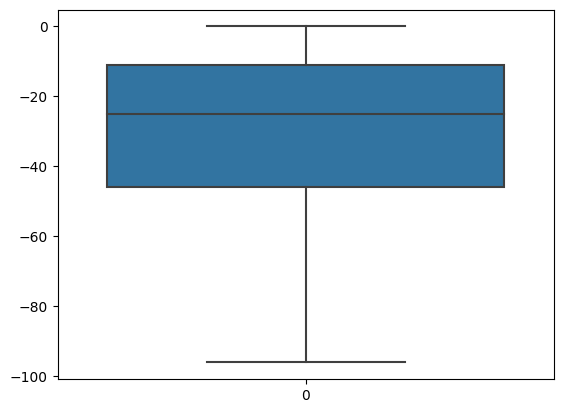

In [7]:
outlier_check(beaureau_balance)

We don't also see an outlier in the Bureau Balance tables numeric values

In [8]:
bureau_missing = missing_values_table(bureau)
bureau_missing

Missing Values,cols,percentages
i64,str,f64
1226791,"""AMT_ANNUITY""",71.47349
1124488,"""AMT_CREDIT_MAX…",65.513264
633653,"""DAYS_ENDDATE_F…",36.916958
591780,"""AMT_CREDIT_SUM…",34.477415
257669,"""AMT_CREDIT_SUM…",15.011932
105553,"""DAYS_CREDIT_EN…",6.149573
13,"""AMT_CREDIT_SUM…",0.000757
0,"""SK_ID_CURR""",0.0
0,"""SK_ID_BUREAU""",0.0


When looking at the Bureau table though we have some columns with missing values let's take a look at them more.

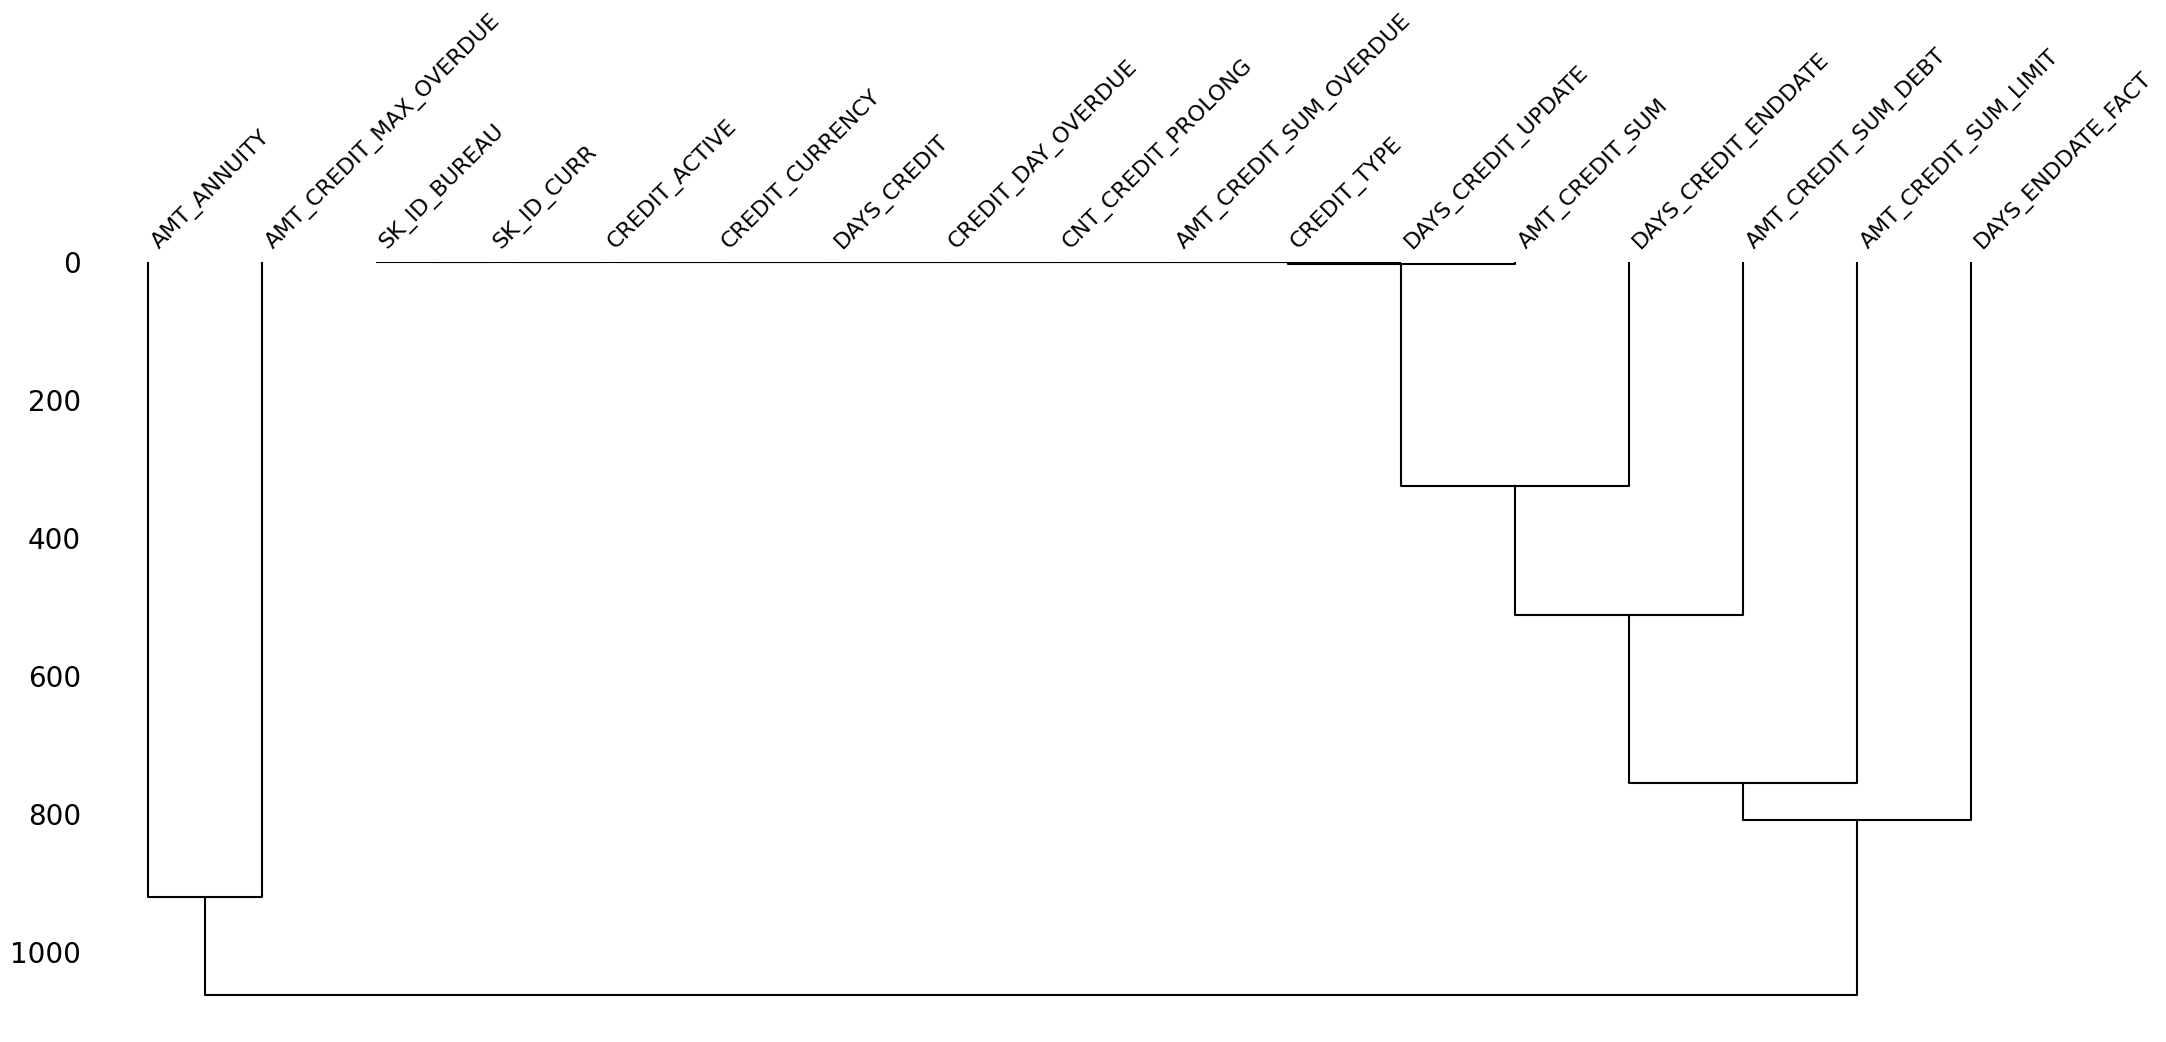

In [9]:
msno.dendrogram(bureau.to_pandas())
plt.show()

From the above plot we can see that the two most missing value columns are somewhat related to each other, and the rest of them are found on the other side clustered alone, so we can simply remove those two columns from the data.

In [10]:
columns_to_drop = bureau_missing.filter(pl.col('percentages') >= 50)['cols'].to_list()

In [11]:
bureau = bureau.drop(columns_to_drop)

In [12]:
missing_values_table(bureau)

Missing Values,cols,percentages
i64,str,f64
633653,"""DAYS_ENDDATE_F…",36.916958
591780,"""AMT_CREDIT_SUM…",34.477415
257669,"""AMT_CREDIT_SUM…",15.011932
105553,"""DAYS_CREDIT_EN…",6.149573
13,"""AMT_CREDIT_SUM…",0.000757
0,"""SK_ID_CURR""",0.0
0,"""SK_ID_BUREAU""",0.0
0,"""CREDIT_ACTIVE""",0.0
0,"""CREDIT_CURRENC…",0.0


We have removed the columns with many missing values.

Next we will do imputation for the missing values of the table. For numeric columns we will use mean imputation, and for categorical columns we will label them as missing.

In [13]:
bureau = bureau.fill_null(strategy='mean')
bureau.head()

SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
i32,i32,cat,cat,i16,i16,f32,f32,i8,f32,f32,f32,f32,cat,i32
215354,5714462,"""Closed""","""currency 1""",-497,0,-153.0,-153.0,0,91323.0,0.0,6229.515137,0.0,"""Consumer credi…",-131
215354,5714463,"""Active""","""currency 1""",-208,0,1075.0,-1017.437134,0,225000.0,171342.0,6229.515137,0.0,"""Credit card""",-20
215354,5714464,"""Active""","""currency 1""",-203,0,528.0,-1017.437134,0,464323.5,137085.125,6229.515137,0.0,"""Consumer credi…",-16
215354,5714465,"""Active""","""currency 1""",-203,0,510.517365,-1017.437134,0,90000.0,137085.125,6229.515137,0.0,"""Credit card""",-16
215354,5714466,"""Active""","""currency 1""",-629,0,1197.0,-1017.437134,0,2.7e6,137085.125,6229.515137,0.0,"""Consumer credi…",-21


Outlier in DAYS_CREDIT column


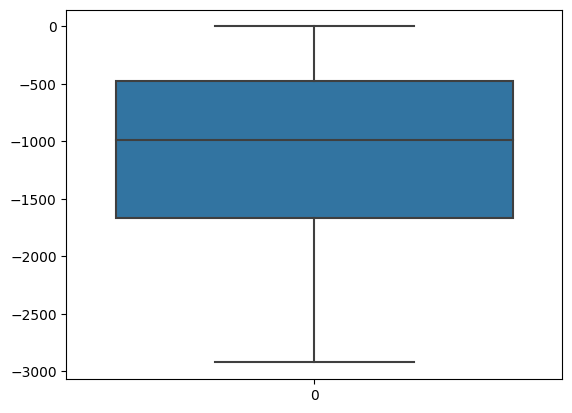

Outlier in CREDIT_DAY_OVERDUE column


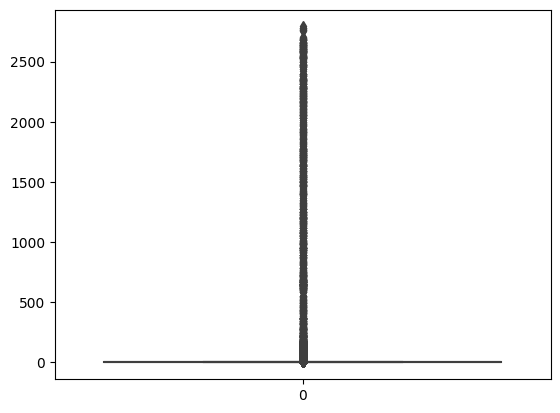

Outlier in DAYS_CREDIT_ENDDATE column


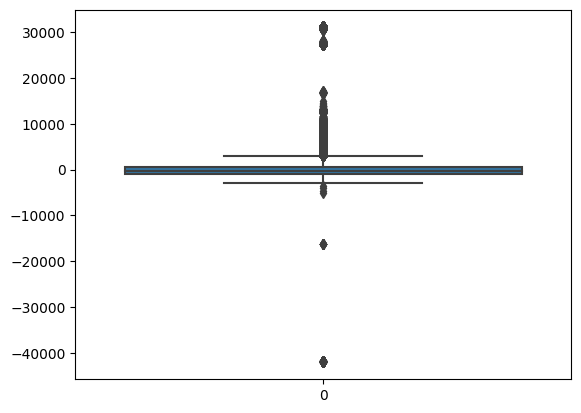

Outlier in DAYS_ENDDATE_FACT column


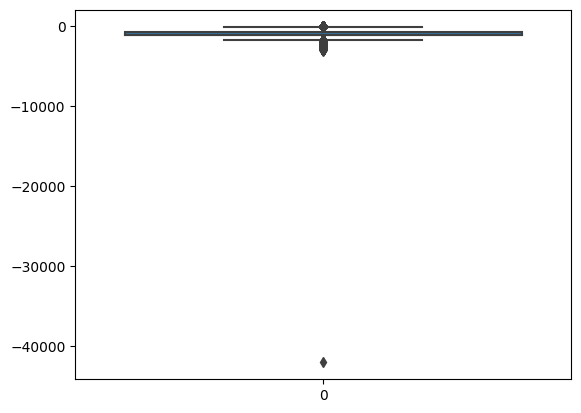

Outlier in CNT_CREDIT_PROLONG column


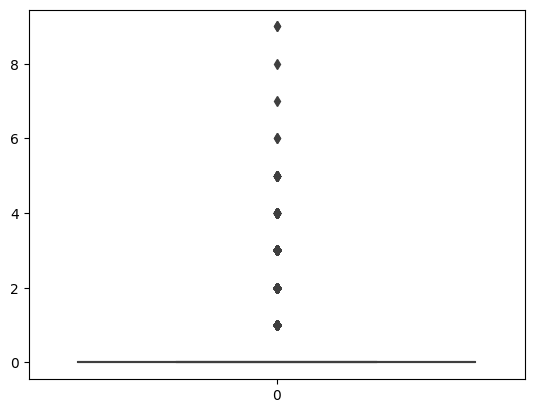

Outlier in AMT_CREDIT_SUM column


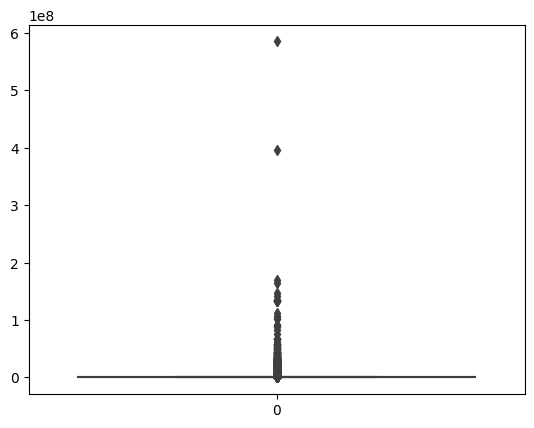

Outlier in AMT_CREDIT_SUM_DEBT column


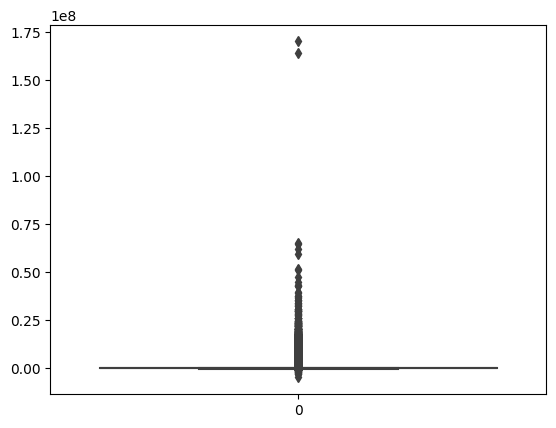

Outlier in AMT_CREDIT_SUM_LIMIT column


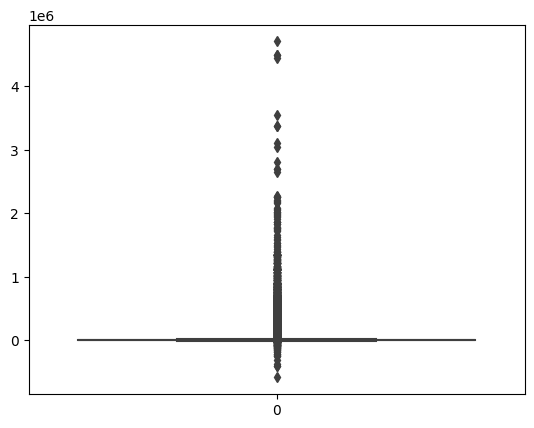

Outlier in AMT_CREDIT_SUM_OVERDUE column


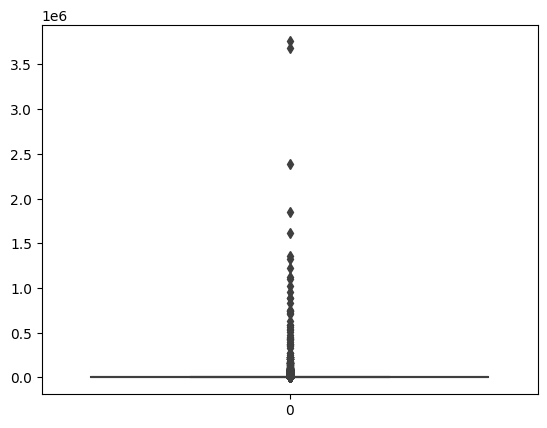

Outlier in DAYS_CREDIT_UPDATE column


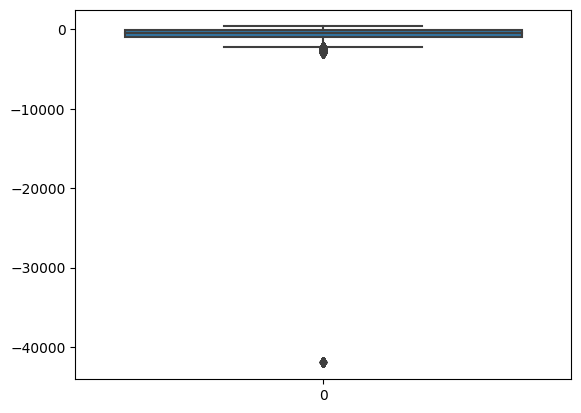

In [14]:
outlier_check(bureau)

In [15]:
bureau = remove_outlier(bureau)

Number of outliers in DAYS_CREDIT column is 0
Outlier removed dataframe shape: (1716428, 15)
Outlier removed dataframe shape: (1716428, 15)
----------------------------------------------
Number of outliers in CREDIT_DAY_OVERDUE column is 4217
Outlier removed dataframe shape: (1712211, 15)
Outlier removed dataframe shape: (1712211, 15)
----------------------------------------------
Number of outliers in DAYS_CREDIT_ENDDATE column is 79022
Outlier removed dataframe shape: (1633189, 15)
Outlier removed dataframe shape: (1633189, 15)
----------------------------------------------
Number of outliers in DAYS_ENDDATE_FACT column is 186360
Outlier removed dataframe shape: (1446829, 15)
Outlier removed dataframe shape: (1446829, 15)
----------------------------------------------
Number of outliers in CNT_CREDIT_PROLONG column is 4489
Outlier removed dataframe shape: (1442340, 15)
Outlier removed dataframe shape: (1442340, 15)
----------------------------------------------
Number of outliers in 

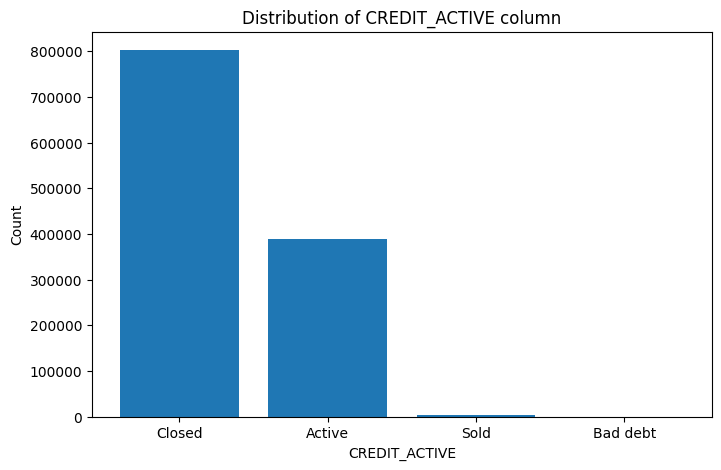

In [16]:
plot_bar(bureau, 'CREDIT_ACTIVE')

Looking at the Status of the Credit Bureau (CB) reported credits, we can see that there are more Closed statuses than that of Active ones.

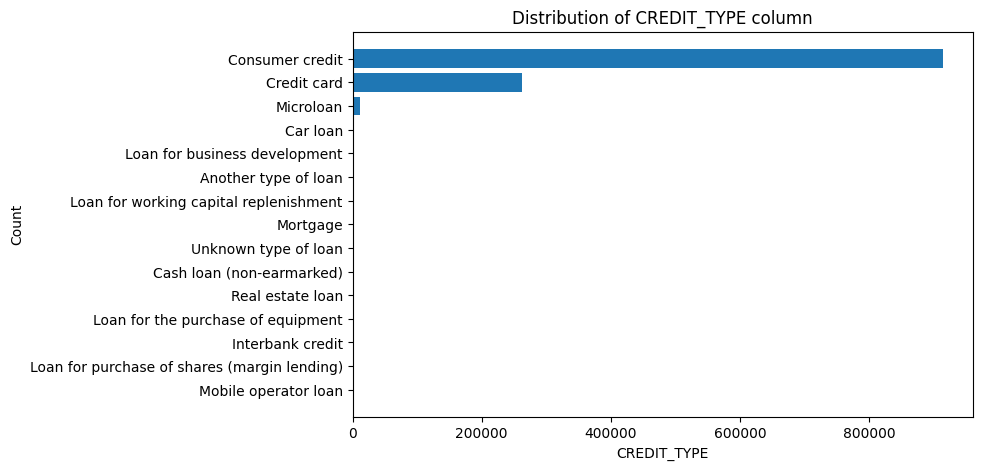

In [17]:
plot_horizontal_bar(bureau, 'CREDIT_TYPE')

From the above plot we can see that Consumer Credit is the most occuring credit type amongst many.

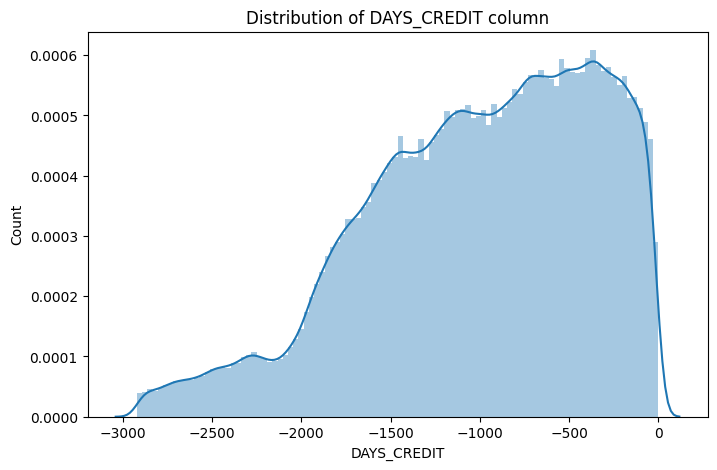

In [18]:
plot_hist(bureau, 'DAYS_CREDIT')

The above plot shows us How many days before current application did client apply for Credit Bureau credit. It looks like many clients have a shorter time span between thier application in the past and now.

#### bureau balance

In [19]:
beaureau_balance.head()

SK_ID_BUREAU,MONTHS_BALANCE,STATUS
i32,i8,cat
5715448,0,"""C"""
5715448,-1,"""C"""
5715448,-2,"""C"""
5715448,-3,"""C"""
5715448,-4,"""C"""


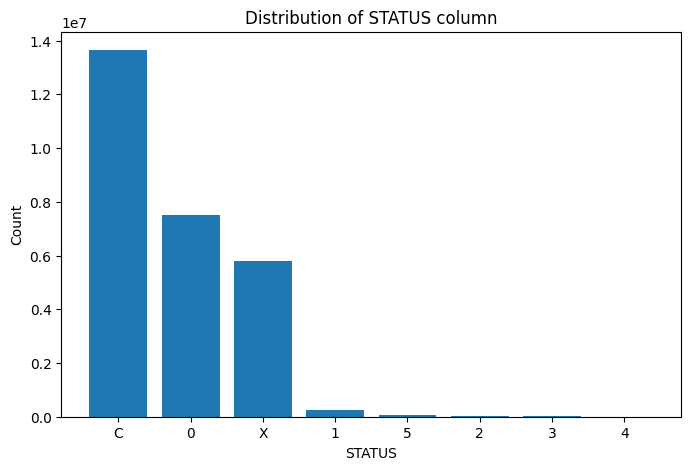

In [20]:
plot_bar(beaureau_balance, 'STATUS')

Status of Credit Bureau loan during the month [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ]

We can clearly see that Closed status is the most dominant.

In [21]:
# aggregate beaureau_balance based on SK_ID_BUREAU
beaureau_balance_agg = beaureau_balance.groupby('SK_ID_BUREAU').agg([
    pl.mean('MONTHS_BALANCE').alias('MONTHS_BALANCE_MEAN'),
])

Here I have aggregated the months balance column using its mean

In [22]:
beaureau_balance_agg.head(5)

SK_ID_BUREAU,MONTHS_BALANCE_MEAN
i32,f64
6731528,-22.5
5669008,-75.5
5789584,-15.5
5960728,-8.5
6654344,-15.0


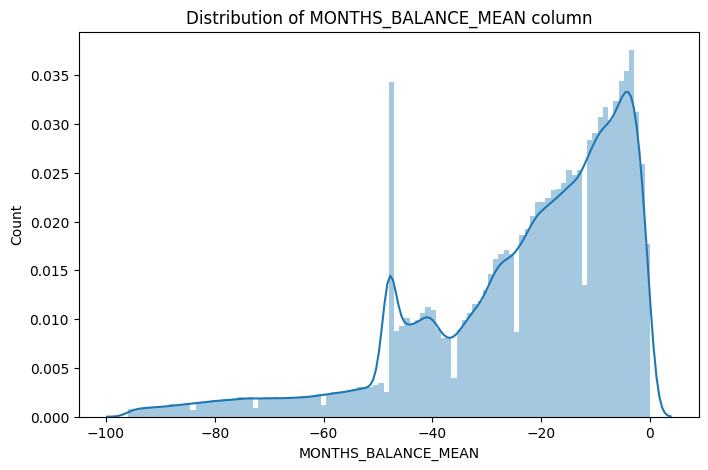

In [23]:
plot_hist(beaureau_balance_agg, 'MONTHS_BALANCE_MEAN')

Month of balance relative to application date (-1 means the freshest balance date). We can see that most are almost fresh.

#### bureau

In [24]:
bureau.head(5)

SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
i32,i32,cat,cat,i16,i16,f32,f32,i8,f32,f32,f32,f32,cat,i32
215354,5714462,"""Closed""","""currency 1""",-497,0,-153.0,-153.0,0,91323.0,0.0,6229.515137,0.0,"""Consumer credi…",-131
215354,5714463,"""Active""","""currency 1""",-208,0,1075.0,-1017.437134,0,225000.0,171342.0,6229.515137,0.0,"""Credit card""",-20
215354,5714464,"""Active""","""currency 1""",-203,0,528.0,-1017.437134,0,464323.5,137085.125,6229.515137,0.0,"""Consumer credi…",-16
215354,5714465,"""Active""","""currency 1""",-203,0,510.517365,-1017.437134,0,90000.0,137085.125,6229.515137,0.0,"""Credit card""",-16
215354,5714468,"""Active""","""currency 1""",-43,0,79.0,-1017.437134,0,42103.800781,42103.800781,0.0,0.0,"""Consumer credi…",-22


In [25]:
bureau_merge = bureau.join(beaureau_balance_agg, on='SK_ID_BUREAU', how='inner')
bureau_merge.head(5)

SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_MEAN
i32,i32,cat,cat,i16,i16,f32,f32,i8,f32,f32,f32,f32,cat,i32,f64
380361,5715451,"""Closed""","""currency 1""",-917,0,-187.0,-759.0,0,74439.0,0.0,0.0,0.0,"""Consumer credi…",-748,-17.5
380361,5715454,"""Closed""","""currency 1""",-1622,0,-1074.0,-1073.0,0,540000.0,0.0,0.0,0.0,"""Consumer credi…",-1006,-34.0
380361,5715456,"""Closed""","""currency 1""",-1449,0,-1084.0,-1267.0,0,60480.0,0.0,0.0,0.0,"""Consumer credi…",-1259,-34.0
380361,5715457,"""Active""","""currency 1""",-222,0,874.0,-1017.437134,0,202500.0,31594.5,0.0,0.0,"""Credit card""",-18,-3.5
380361,5715460,"""Active""","""currency 1""",-233,0,498.0,-1017.437134,0,168525.0,137085.125,6229.515137,0.0,"""Consumer credi…",-16,-3.5


Finally we join the aggregated data with the original.

In [26]:
string_columns = [name for name, dtype in zip(bureau_merge.columns, bureau_merge.dtypes) if dtype == pl.Utf8]

In [27]:
bureau_merge = bureau_merge.with_columns(
    [pl.col(name).str.replace_all(r'^"(.*?)"$', r'\1').alias(name) for name in string_columns]
)

The above is to remove quoted string values.

In [28]:
bureau_merge.head()

SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_MEAN
i32,i32,cat,cat,i16,i16,f32,f32,i8,f32,f32,f32,f32,cat,i32,f64
380361,5715451,"""Closed""","""currency 1""",-917,0,-187.0,-759.0,0,74439.0,0.0,0.0,0.0,"""Consumer credi…",-748,-17.5
380361,5715454,"""Closed""","""currency 1""",-1622,0,-1074.0,-1073.0,0,540000.0,0.0,0.0,0.0,"""Consumer credi…",-1006,-34.0
380361,5715456,"""Closed""","""currency 1""",-1449,0,-1084.0,-1267.0,0,60480.0,0.0,0.0,0.0,"""Consumer credi…",-1259,-34.0
380361,5715457,"""Active""","""currency 1""",-222,0,874.0,-1017.437134,0,202500.0,31594.5,0.0,0.0,"""Credit card""",-18,-3.5
380361,5715460,"""Active""","""currency 1""",-233,0,498.0,-1017.437134,0,168525.0,137085.125,6229.515137,0.0,"""Consumer credi…",-16,-3.5


In [29]:
bureau_merge_agg = bureau_merge.group_by('SK_ID_CURR').agg([
    pl.mean('DAYS_CREDIT').alias('DAYS_CREDIT_MEAN'),
    pl.mean('AMT_CREDIT_SUM').alias('AMT_CREDIT_SUM_MEAN'),
    pl.mean('AMT_CREDIT_SUM_DEBT').alias('AMT_CREDIT_SUM_DEBT_MEAN'),
])

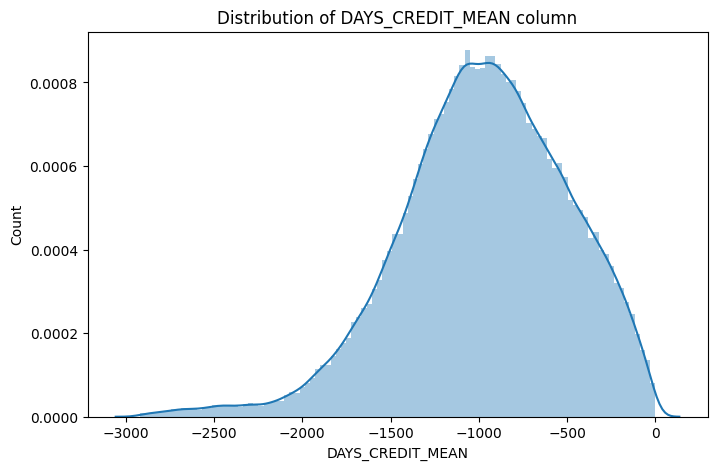

In [30]:
plot_hist(bureau_merge_agg, 'DAYS_CREDIT_MEAN')

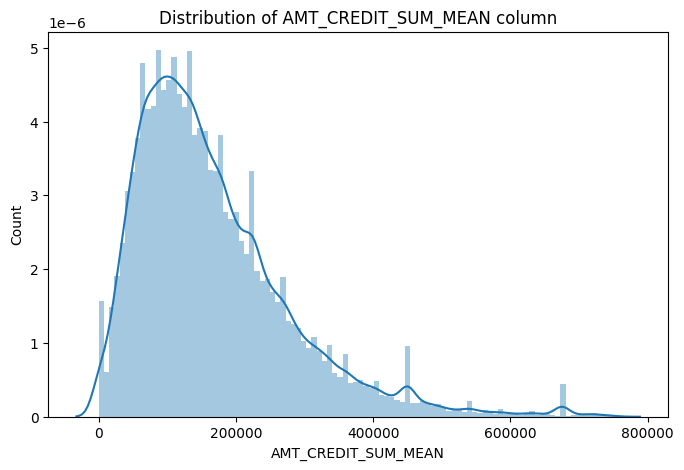

In [31]:
plot_hist(bureau_merge_agg, 'AMT_CREDIT_SUM_MEAN')

The above plot is about the Current credit amount for the Credit Bureau credit after aggregation through mean. We can see that the mean for most applicants is smaller.

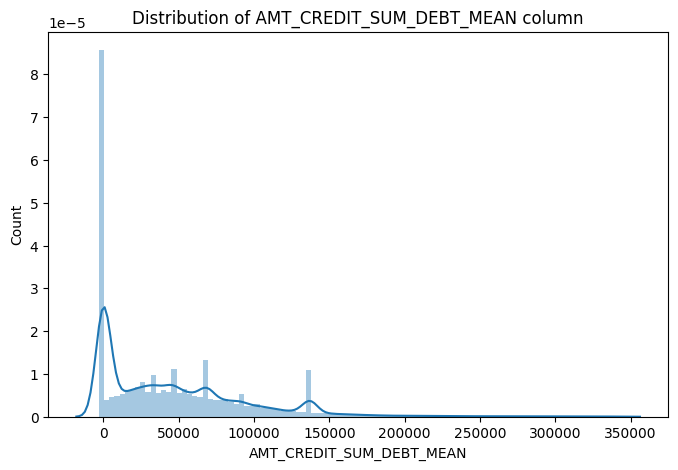

In [32]:
plot_hist(bureau_merge_agg, 'AMT_CREDIT_SUM_DEBT_MEAN')

The above plot is about Current debt on Credit Bureau credit after aggregation through mean.

In [33]:
bureau_merge = bureau_merge.join(bureau_merge_agg, on='SK_ID_CURR', how='inner')

In [34]:
bureau_merge = reduce_memory_usage_pl(bureau_merge, 'bureau_merge')

Memory usage of dataframe bureau_merge is 39.92 MB
Memory usage of dataframe bureau_merge became 34.21 MB


In [35]:
bureau_merge = bureau_merge.unique(subset=['SK_ID_CURR'], maintain_order=True)

### application related

In [36]:
print(f'application_test shape: {application_test.shape}')
print(f'application_train shape: {application_train.shape}')

application_test shape: (48744, 121)
application_train shape: (307511, 122)


In [37]:
print(f'Application test duplicated values: {application_test.is_duplicated().sum()}')
print(f'Application train duplicated values: {application_train.is_duplicated().sum()}')

Application test duplicated values: 0
Application train duplicated values: 0


In [38]:
missing_vals = missing_values_table(application_test)
missing_vals

Missing Values,cols,percentages
i64,str,f64
33495,"""COMMONAREA_AVG…",68.71615
33495,"""COMMONAREA_MOD…",68.71615
33495,"""COMMONAREA_MED…",68.71615
33347,"""NONLIVINGAPART…",68.412523
33347,"""NONLIVINGAPART…",68.412523
33347,"""NONLIVINGAPART…",68.412523
32797,"""FONDKAPREMONT_…",67.284179
32780,"""LIVINGAPARTMEN…",67.249302
32780,"""LIVINGAPARTMEN…",67.249302


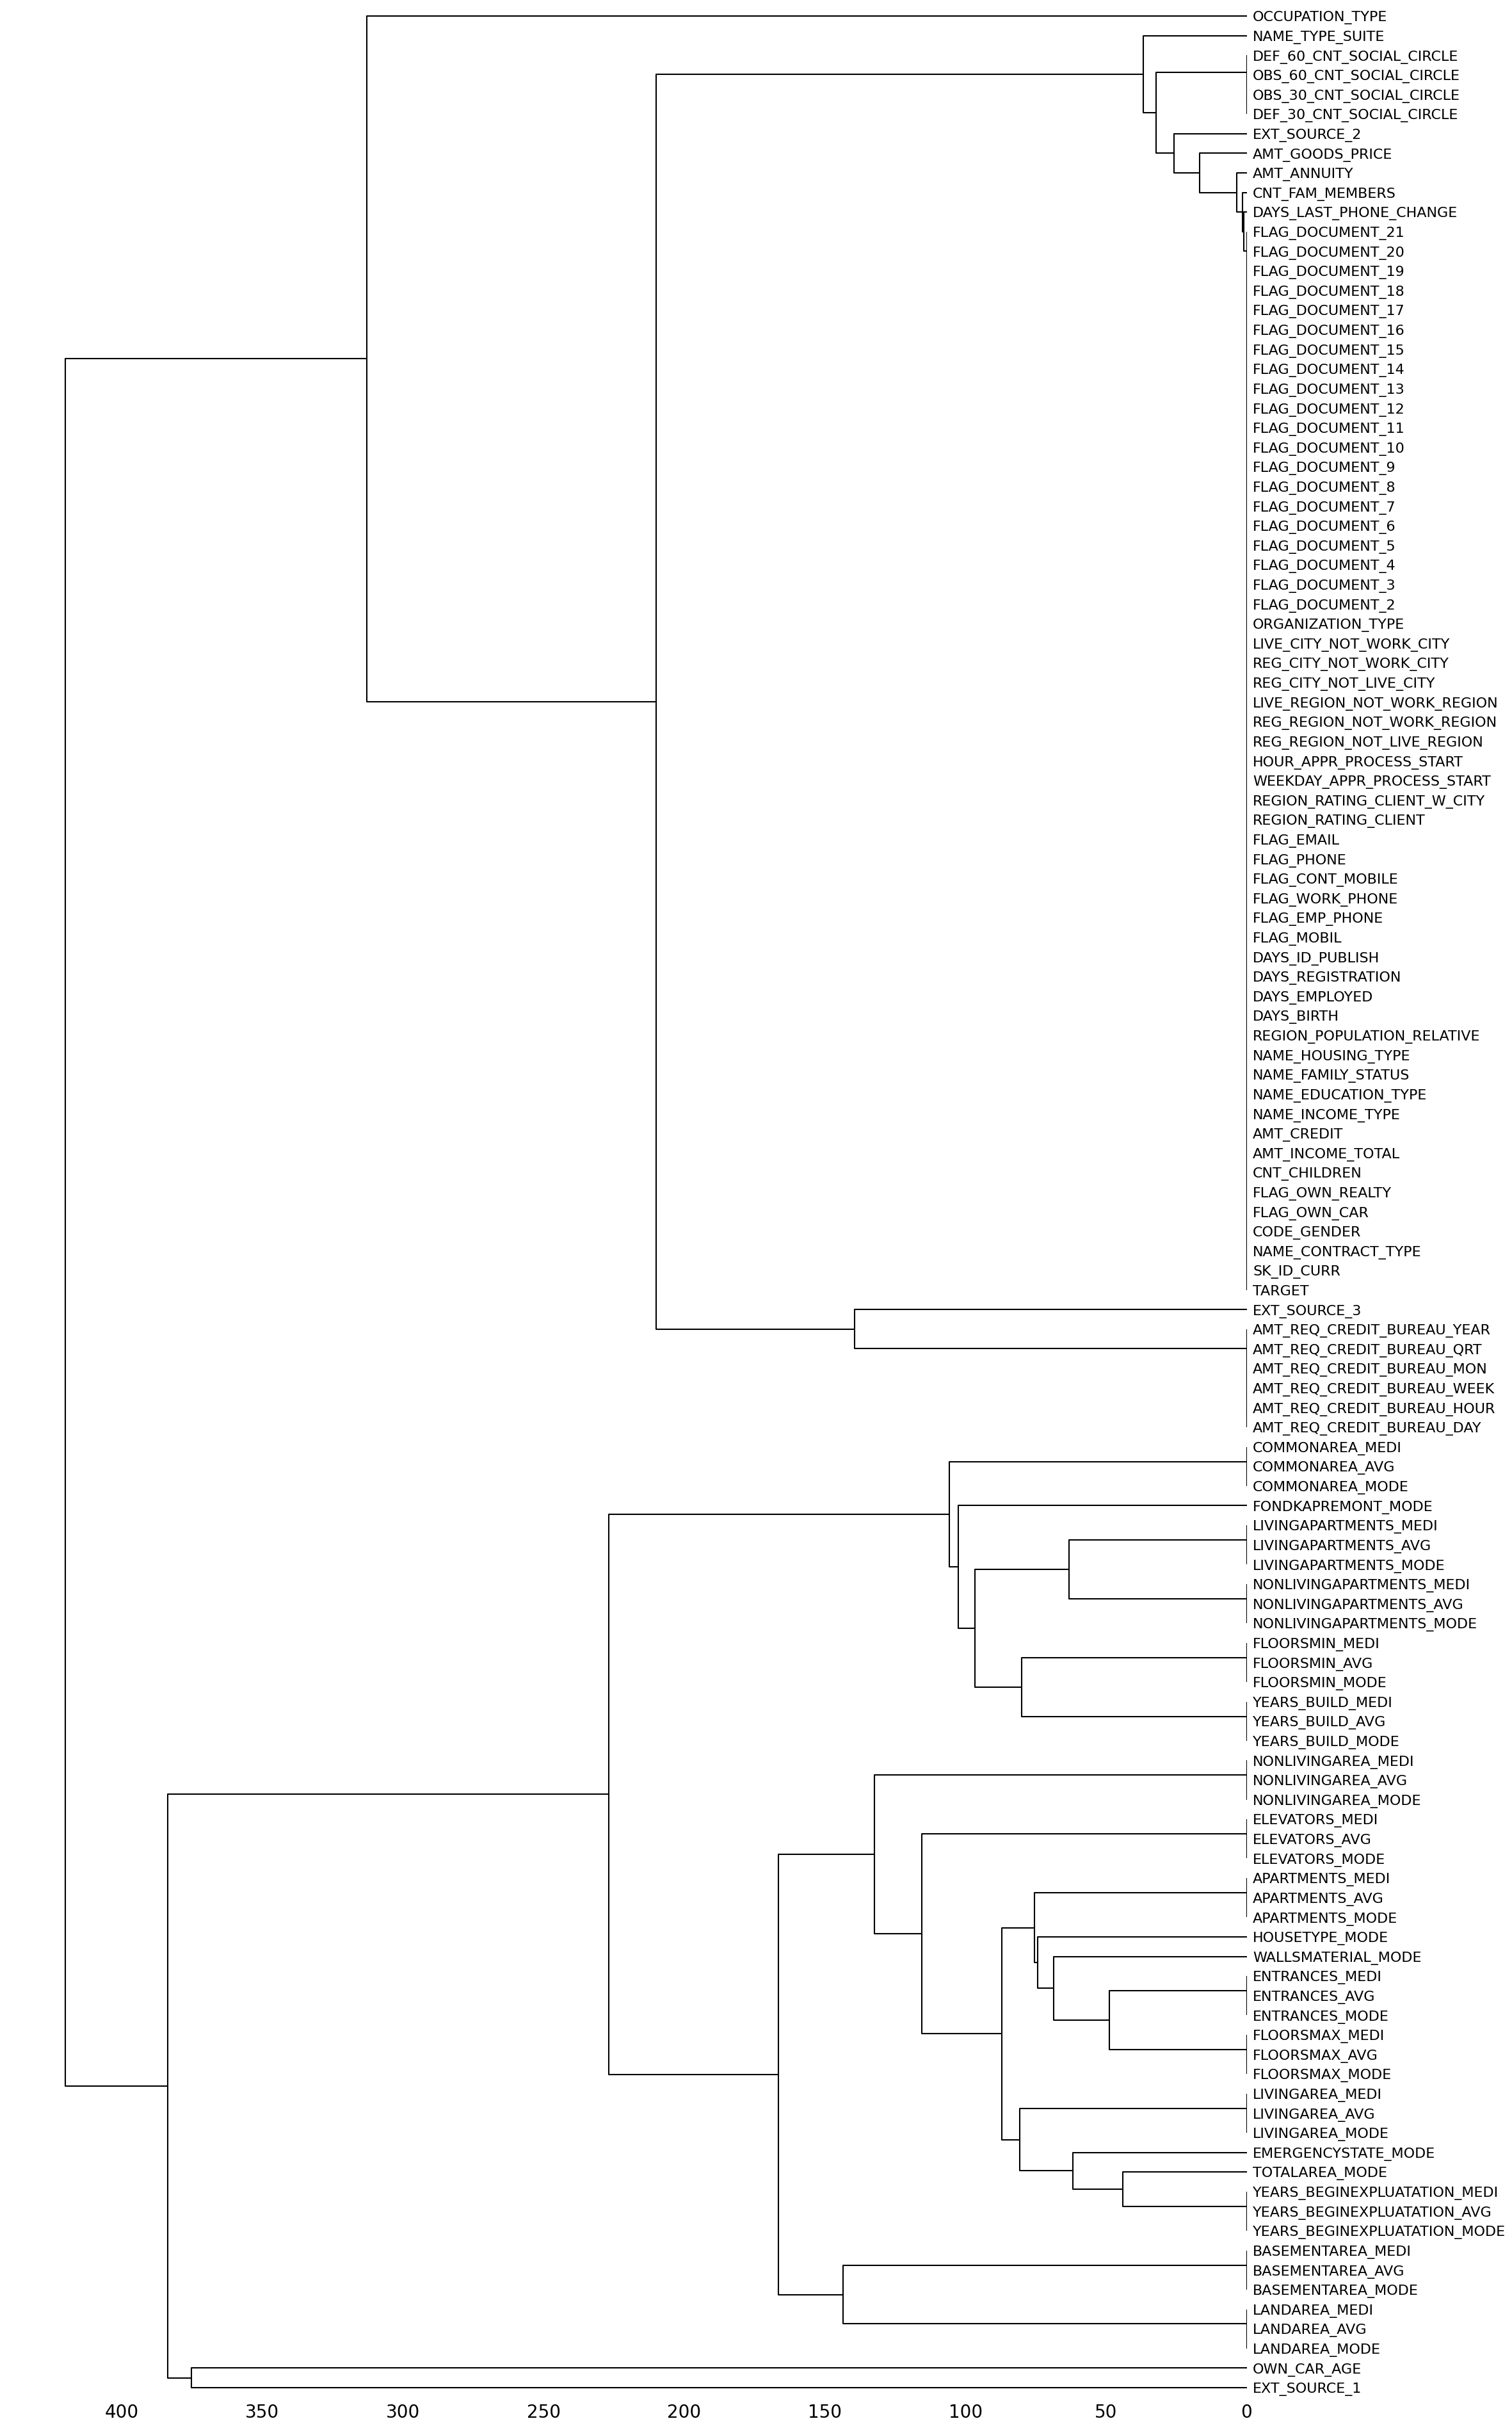

In [39]:
msno.dendrogram(application_train.to_pandas())
plt.show()

From the above plot we can see that columns with the same amount of missing values are clustered together, which shows that if one of the data points is missing for one row it is most likely to be absent in the other.

Many columns with missing values in the application test and train sets

In [40]:
columns_to_drop = missing_vals.filter(pl.col('percentages') >= 50)['cols'].to_list()
application_test = application_test.drop(columns_to_drop)  

In [41]:
application_train = application_train.drop(columns_to_drop)

In [42]:
application_train.shape, application_test.shape

((307511, 93), (48744, 92))

In [43]:
numerical_cols_test = application_test.select(cs.by_dtype(pl.Int64, pl.Float64, pl.Int32, pl.Float32, pl.Int16, pl.Int8))

In [44]:
fill_by_mean_test = numerical_cols_test.fill_null(strategy='mean')

In [45]:
categorical_cols_test = application_test.select(cs.string(include_categorical=True))

In [46]:
categorical_cols_test = categorical_cols_test.fill_null(value='missing')

In [47]:
application_test = fill_by_mean_test.hstack(categorical_cols_test)

In [48]:
missing_vals = missing_values_table(application_test)
missing_vals.head()

Missing Values,cols,percentages
i64,str,f64
0,"""SK_ID_CURR""",0.0
0,"""CNT_CHILDREN""",0.0
0,"""AMT_INCOME_TOT…",0.0
0,"""AMT_CREDIT""",0.0
0,"""AMT_ANNUITY""",0.0


In [49]:
numerical_cols = application_train.select(cs.by_dtype(pl.Int64, pl.Float64, pl.Int32, pl.Float32, pl.Int16, pl.Int8))

In [50]:
fill_by_mean = numerical_cols.fill_null(strategy='mean')

In [51]:
mis_val = missing_values_table(fill_by_mean)
mis_val.head()

Missing Values,cols,percentages
i64,str,f64
0,"""SK_ID_CURR""",0.0
0,"""TARGET""",0.0
0,"""CNT_CHILDREN""",0.0
0,"""AMT_INCOME_TOT…",0.0
0,"""AMT_CREDIT""",0.0


In [52]:
categorical_cols = application_train.select(cs.string(include_categorical=True))

In [53]:
categorical_cols = categorical_cols.fill_null(value='missing')

In [54]:
application_train = fill_by_mean.hstack(categorical_cols)

In [55]:
application_train.head(5)

SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,…,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
i32,i8,i8,f32,f32,f32,f32,f32,i16,i32,f32,i16,i8,i8,i8,i8,i8,i8,f32,i8,i8,i8,i8,i8,i8,i8,i8,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,f32,f32,f32,f32,f32,f32,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat
100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.9722,0.069,0.0833,0.019,0.0252,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,"""Cash loans""","""M""","""N""","""Y""","""Unaccompanied""","""Working""","""Secondary / se…","""Single / not m…","""House / apartm…","""Laborers""","""WEDNESDAY""","""Business Entit…","""block of flats…","""Stone, brick""","""No"""
100003,0,0,270000.0,1293502.5,35698.5,1.1295e6,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.510853,0.0959,0.9851,0.0345,0.2917,0.0549,0.0924,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"""Cash loans""","""F""","""N""","""N""","""Family""","""State servant""","""Higher educati…","""Married""","""House / apartm…","""Core staff""","""MONDAY""","""School""","""block of flats…","""Block""","""No"""
100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.50213,0.555912,0.729567,0.11744,0.977735,0.149725,0.226282,0.107399,0.114231,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"""Revolving loan…","""M""","""Y""","""Y""","""Unaccompanied""","""Working""","""Secondary / se…","""Single / not m…","""House / apartm…","""Laborers""","""MONDAY""","""Government""","""missing""","""missing""","""missing"""
100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.50213,0.650442,0.510853,0.11744,0.977735,0.149725,0.226282,0.107399,0.114231,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,"""Cash loans""","""F""","""N""","""Y""","""Unaccompanied""","""Working""","""Secondary / se…","""Civil marriage…","""House / apartm…","""Laborers""","""WEDNESDAY""","""Business Entit…","""missing""","""missing""","""missing"""
100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.50213,0.322738,0.510853,0.11744,0.977735,0.149725,0.226282,0.107399,0.114231,…,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"""Cash loans""","""M""","""N""","""Y""","""Unaccompanied""","""Working""","""Secondary / se…","""Single / not m…","""House / apartm…","""Core staff""","""THURSDAY""","""Religion""","""missing""","""missing""","""missing"""


Above I have used the same mechanism for treating the other missing values by imputing the columns with the necessary values.

In [56]:
application_test.shape, application_train.shape

((48744, 92), (307511, 93))

In [57]:
application_train_pandas = application_train.to_pandas()

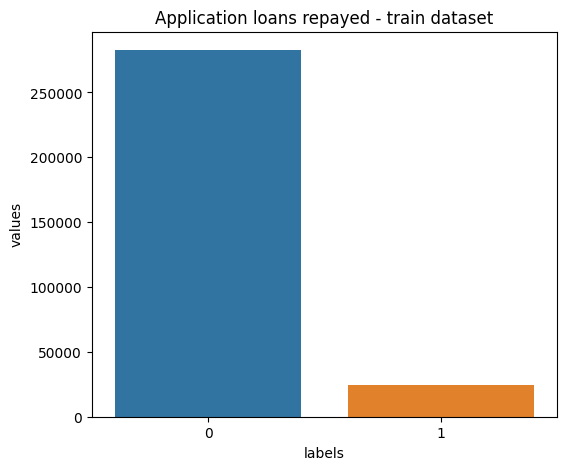

In [58]:
temp = application_train_pandas["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})
plt.figure(figsize = (6,5))
plt.title('Application loans repayed - train dataset')
sns.barplot(x = 'labels', y="values", data=df)
plt.show()

We can see a huge imbalance on the column to be predicted.

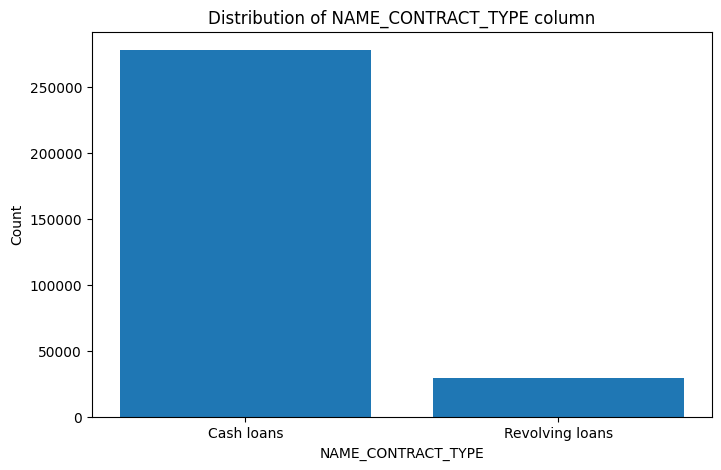

In [59]:
plot_bar(application_train, 'NAME_CONTRACT_TYPE')

Most loans are actually cash loans as compared to revolving loans.

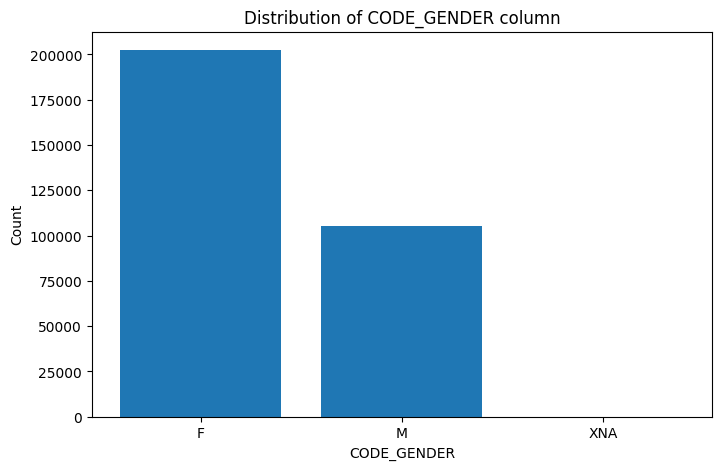

In [60]:
plot_bar(application_train, 'CODE_GENDER')

We see a lot of Female applicants as compared to male.

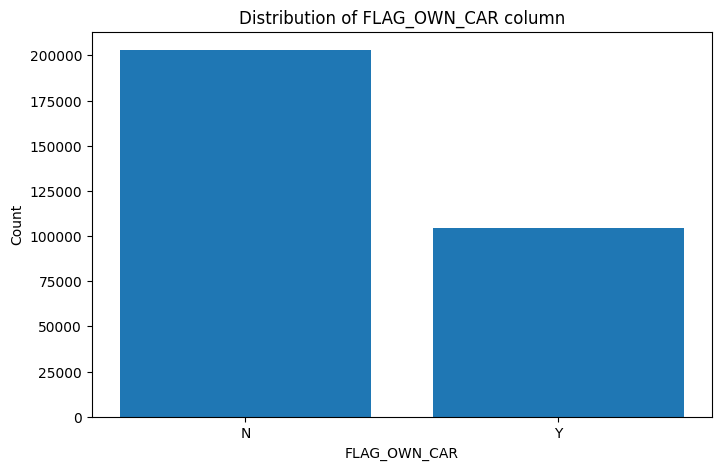

In [61]:
plot_bar(application_train, 'FLAG_OWN_CAR')

Most people claim that they don't have a car.

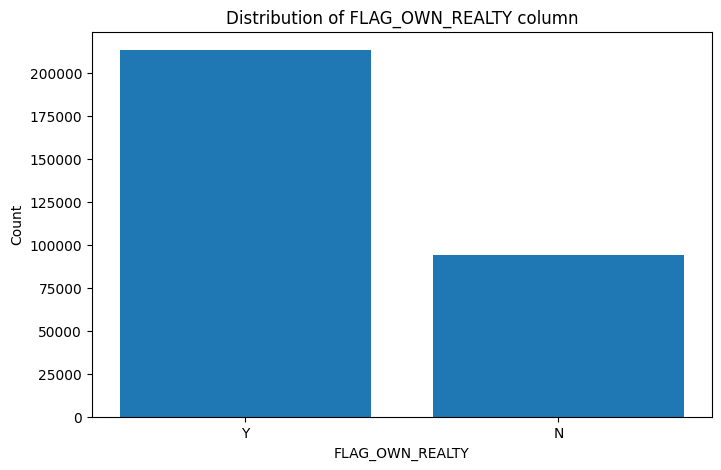

In [62]:
plot_bar(application_train, 'FLAG_OWN_REALTY')

Many borrowers actually have either a house or a flat.

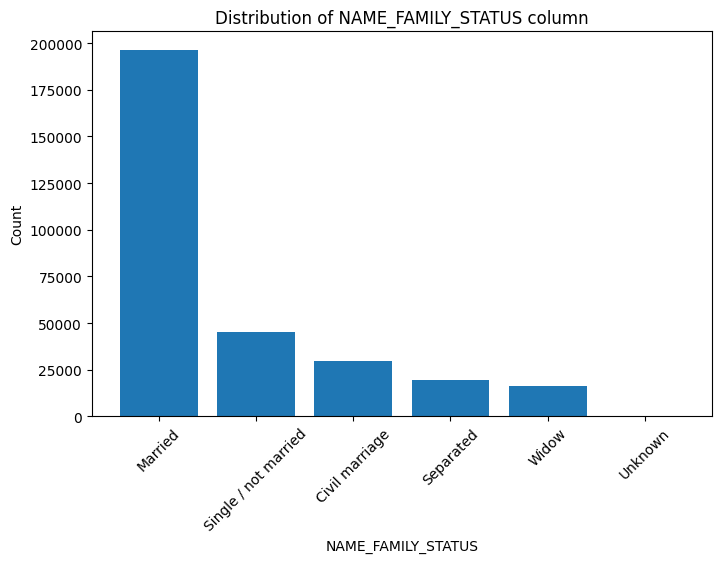

In [63]:
plot_bar_xticks(application_train, 'NAME_FAMILY_STATUS')

There are more married individuals as compared to the ones that are not.

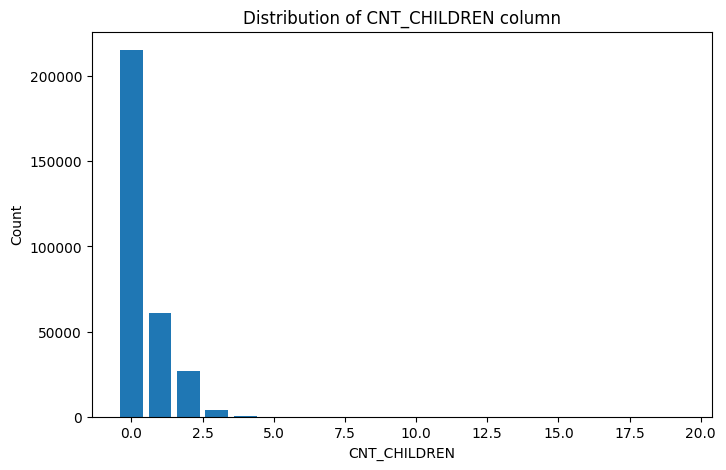

In [64]:
plot_bar(application_train, 'CNT_CHILDREN')

Most families have a children count of less than 5

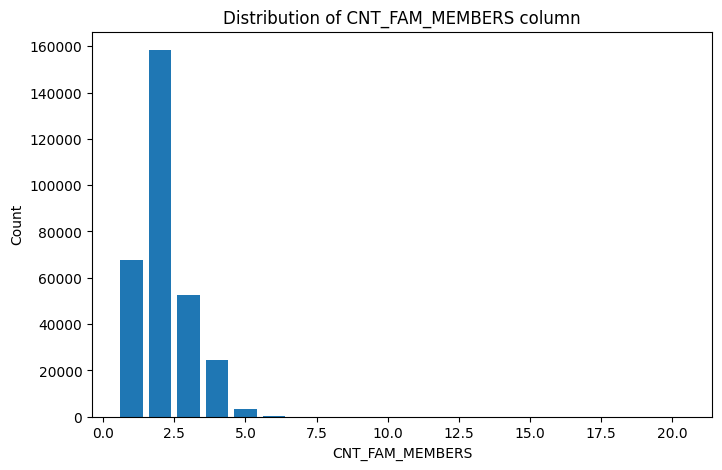

In [65]:
plot_bar(application_train, 'CNT_FAM_MEMBERS')

Most total family member count is less than 7.

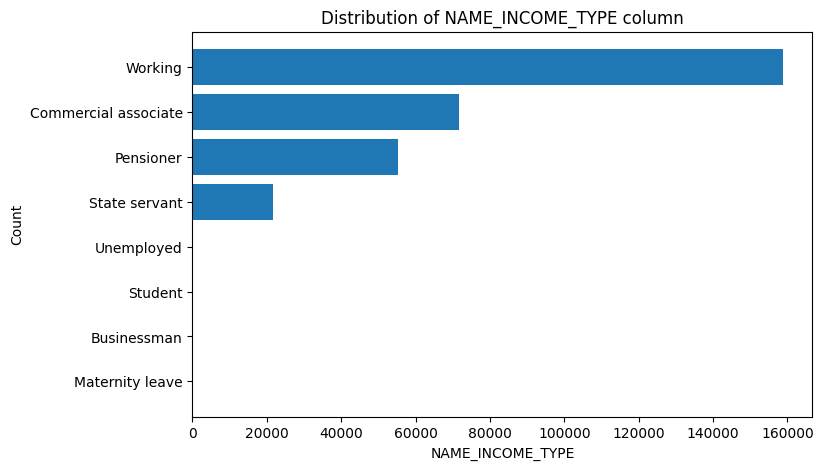

In [66]:
plot_horizontal_bar(application_train, 'NAME_INCOME_TYPE')

Most individuals income type is through working in this data.

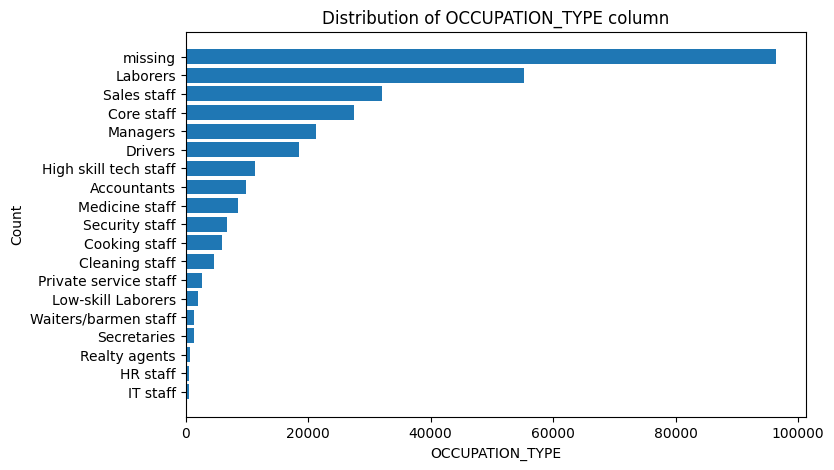

In [67]:
plot_horizontal_bar(application_train, 'OCCUPATION_TYPE')

Majority of the occupation type is missing, but next to it we have laborers.

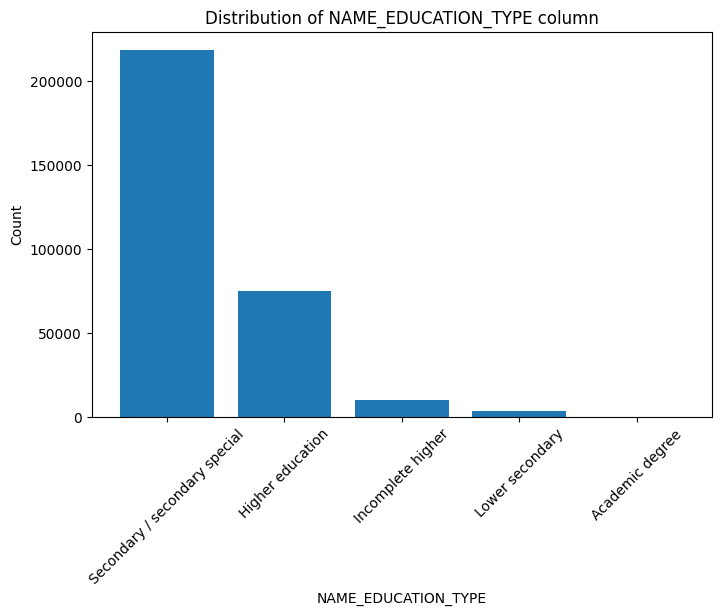

In [68]:
plot_bar_xticks(application_train, 'NAME_EDUCATION_TYPE')

Looking at education level of applicants we see that most have at least reached Secondary school level.

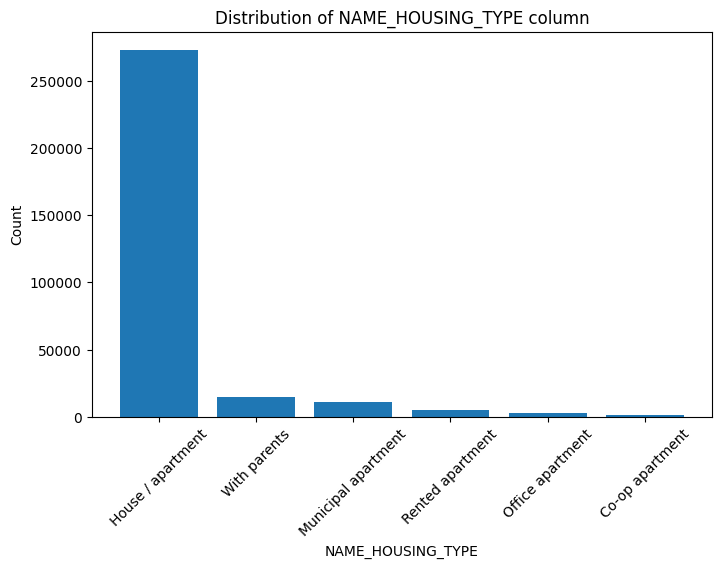

In [69]:
plot_bar_xticks(application_train, 'NAME_HOUSING_TYPE')

For housing type the largest share belongs to normal houses/ Apartments

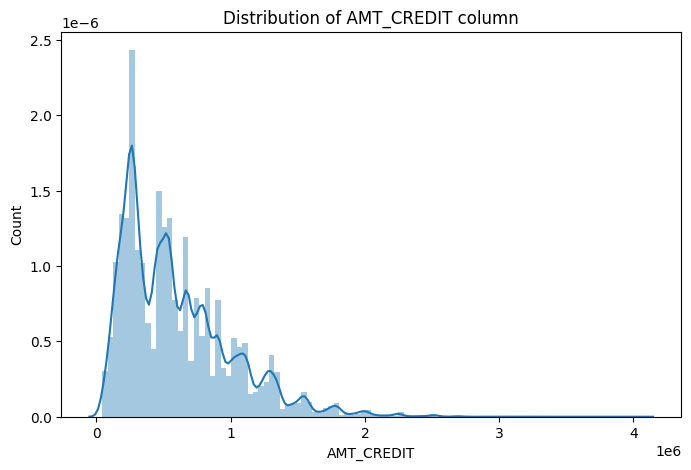

In [70]:
plot_hist(application_train, 'AMT_CREDIT')

For credit amount we can see that most amounts are below 1 million.

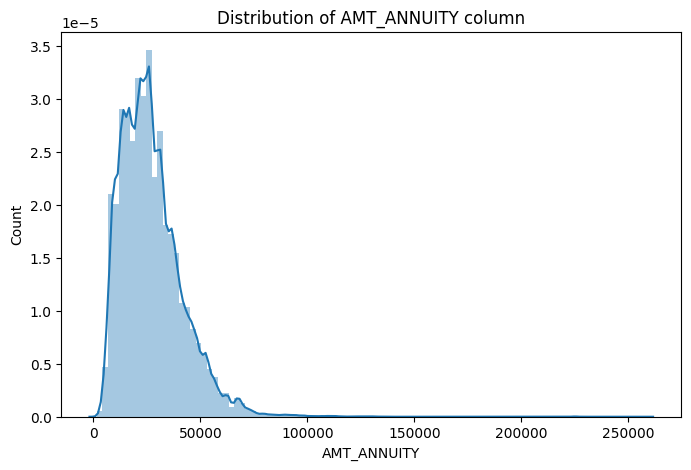

In [71]:
plot_hist(application_train, 'AMT_ANNUITY')

Looking at the loans annuity we can see that majority of the loans are under a 100,000 annuity 

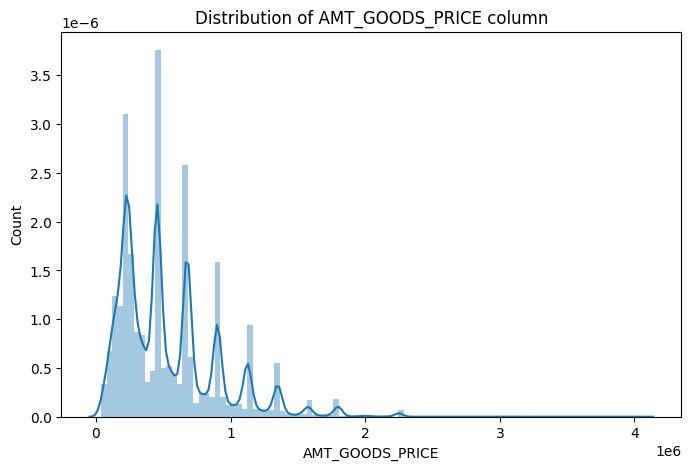

In [72]:
plot_hist(application_train, 'AMT_GOODS_PRICE')

For consumer loans amount goods price is the price of the goods for which the loan is given. We can see that most goods are less than an amount of 2 million

<Figure size 640x480 with 0 Axes>

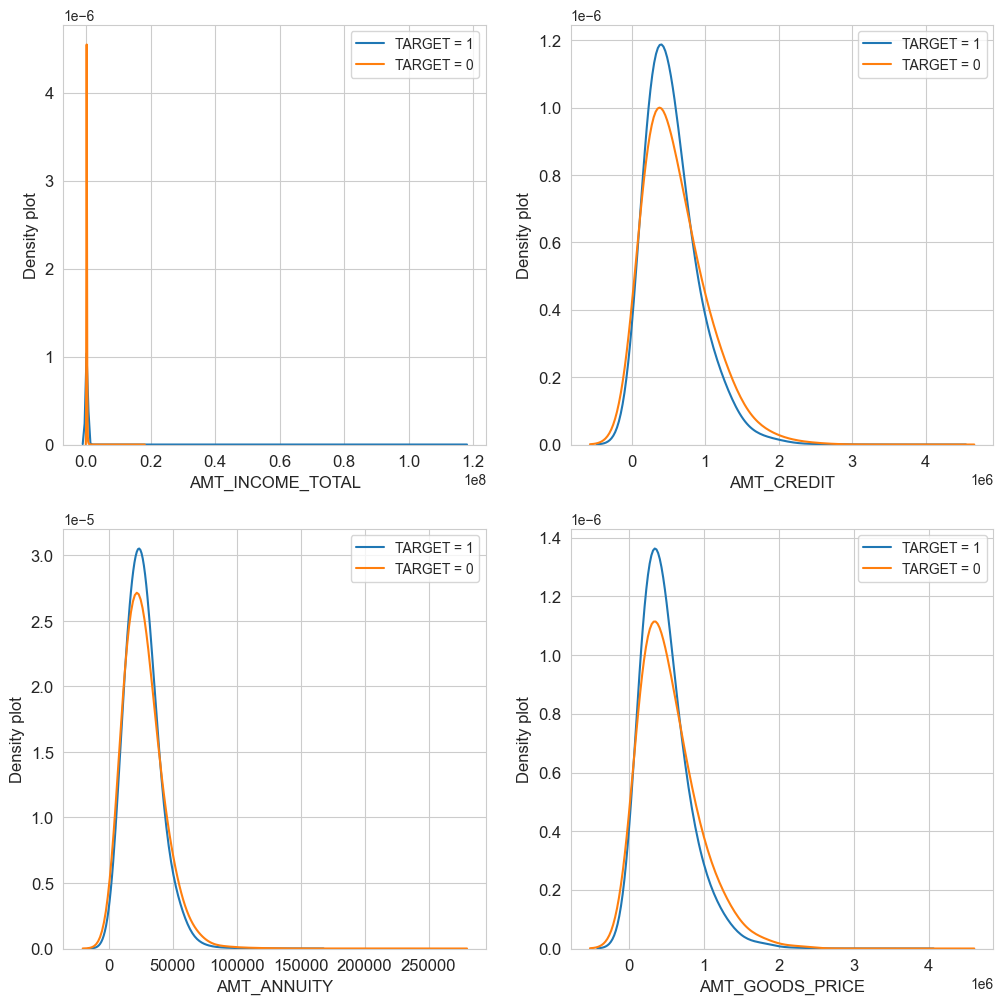

In [73]:
plot_distribution_comp(application_train.to_pandas(), ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])

When we look at the composition of the target class with the above 4 features it looks like it is almost equally distributed.

In [74]:
application_train_agg = aggregate_and_remove(application_train, ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE', 'CNT_CHILDREN'])
application_test_agg = aggregate_and_remove(application_test, ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE', 'CNT_CHILDREN'])

Now we do aggregations on the following columns 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE', 'CNT_CHILDREN'

In [75]:
application_train = application_train.join(application_train_agg, on='SK_ID_CURR', how='inner')

In [76]:
application_test = application_test.join(application_test_agg, on='SK_ID_CURR', how='inner')

Then we will join the aggregations to both the train and test sets

In [77]:
application_train.shape, application_test.shape

((307511, 100), (48744, 99))

In [78]:
application_train = reduce_memory_usage_pl(application_train, 'application_train')
application_test = reduce_memory_usage_pl(application_test, 'application_test')

Memory usage of dataframe application_train is 87.1 MB
Memory usage of dataframe application_train became 83.58 MB
Memory usage of dataframe application_test is 13.76 MB
Memory usage of dataframe application_test became 13.2 MB


### credit card balance

In [79]:
credit_card_balance.shape

(3840312, 23)

In [80]:
credit_card_balance.is_duplicated().sum()

0

In [81]:
missing_values_table(credit_card_balance)

Missing Values,cols,percentages
i64,str,f64
767988,"""AMT_PAYMENT_CU…",19.998063
749816,"""AMT_DRAWINGS_A…",19.524872
749816,"""AMT_DRAWINGS_O…",19.524872
749816,"""AMT_DRAWINGS_P…",19.524872
749816,"""CNT_DRAWINGS_A…",19.524872
749816,"""CNT_DRAWINGS_O…",19.524872
749816,"""CNT_DRAWINGS_P…",19.524872
305236,"""AMT_INST_MIN_R…",7.948208
305236,"""CNT_INSTALMENT…",7.948208


We have missing values in this table but they are not significantly too many so we can impute them.

In [82]:
credit_card_balance = credit_card_balance.fill_null(strategy='mean')

In [83]:
missing_values_table(credit_card_balance).head()

Missing Values,cols,percentages
i64,str,f64
0,"""SK_ID_PREV""",0.0
0,"""SK_ID_CURR""",0.0
0,"""MONTHS_BALANCE…",0.0
0,"""AMT_BALANCE""",0.0
0,"""AMT_CREDIT_LIM…",0.0


In [84]:
credit_card_balance.head()

SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
i32,i32,i8,f32,i32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i16,f32,f32,f32,cat,i16,i16
2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,1800.0,1800.0,0.0,0.0,0.0,0.0,1,0.0,1.0,35.0,"""Active""",0,0
2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,2250.0,60175.078125,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,"""Active""",0,0
1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.0,2250.0,2250.0,26926.425781,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,"""Active""",0,0
1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,11925.0,11925.0,224949.28125,233048.96875,233048.96875,1.0,1,0.0,0.0,10.0,"""Active""",0,0
1891521,126868,-1,453919.46875,450000,0.0,11547.0,0.0,11547.0,22924.890625,27000.0,27000.0,443044.40625,453919.46875,453919.46875,0.0,1,0.0,1.0,101.0,"""Active""",0,0


In [ ]:
credit_card_balance = remove_outlier(credit_card_balance)

We have removed extreme values form our table.

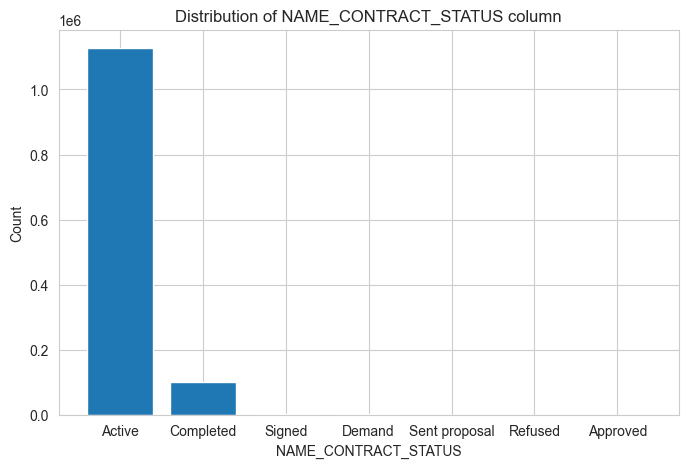

In [86]:
plot_bar(credit_card_balance, 'NAME_CONTRACT_STATUS')

The above plot shows the Contract status on the previous credit. We can see that the most dominant status is Active.

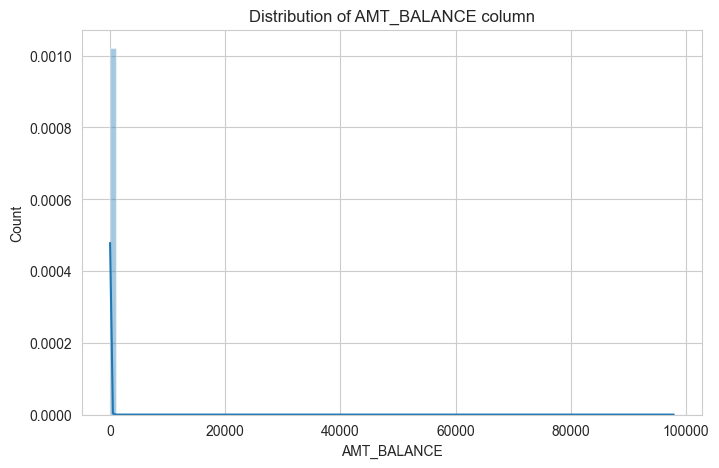

In [87]:
plot_hist(credit_card_balance, 'AMT_BALANCE')

When looking at the Balance during the month of previous credit we see that most balances were 0 during the month of the previous credit.

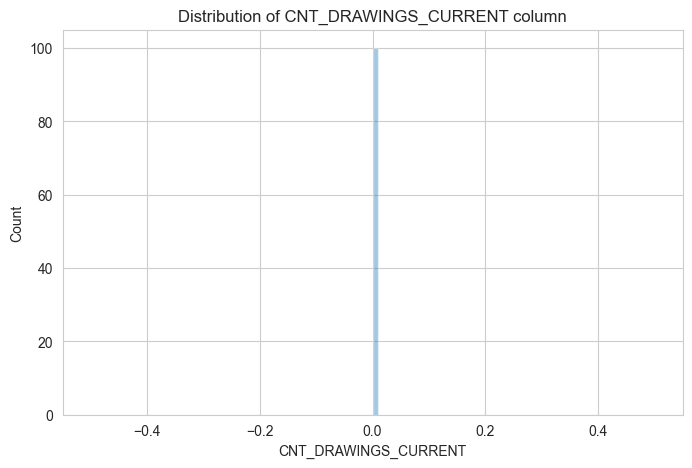

In [88]:
plot_hist(credit_card_balance, 'CNT_DRAWINGS_CURRENT')

The above plot shows us the Number of drawings during this month on the previous credit. We also see from above that the drawings for all are a 0. 

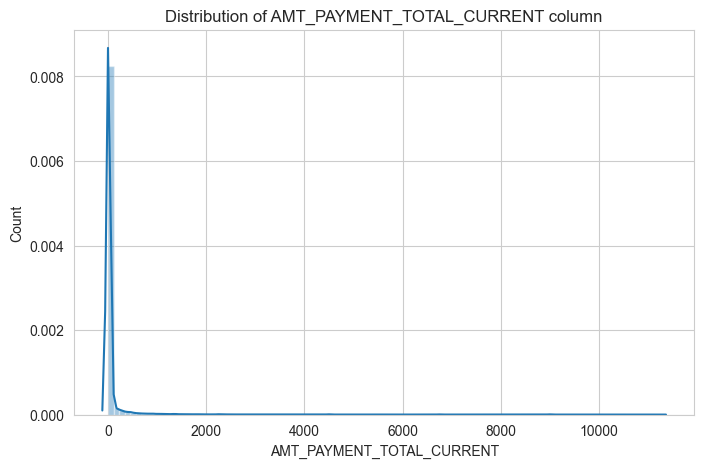

In [89]:
plot_hist(credit_card_balance, 'AMT_PAYMENT_TOTAL_CURRENT')

The above plot shows us How much the client paid during the month in total on the previous credit, as of the above we see that most are less than 2,000 and majority of those are a 0.

In [90]:
credit_card_balance.head()

SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
i32,i32,i8,f32,i32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i16,f32,f32,f32,cat,i16,i16
1864742,303581,-1,0.0,45000,0.0,0.0,0.0,0.0,0.0,2.295,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,59.0,"""Active""",0,0
1039039,276642,-6,0.0,67500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,33.0,"""Completed""",0,0
2016842,302450,-3,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.0,"""Completed""",0,0
1487883,379250,-4,0.0,180000,0.0,0.0,0.0,0.0,1520.550049,1804.319946,1804.319946,0.0,0.0,0.0,0.0,0,0.0,0.0,13.0,"""Active""",0,0
1426111,116448,-7,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,15.0,"""Completed""",0,0


In [91]:
credit_card_balance_agg = aggregate_and_remove(credit_card_balance, ['AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'SK_DPD'])

Let's do aggregations on the above columns.

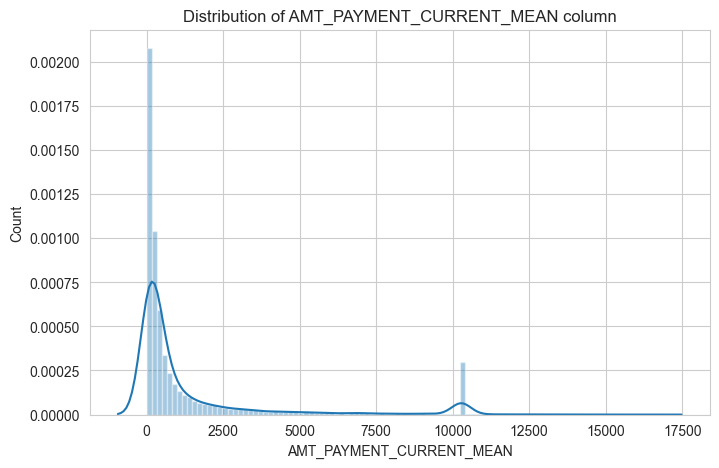

In [92]:
plot_hist(credit_card_balance_agg, 'AMT_PAYMENT_CURRENT_MEAN')

After aggregation the information about How much did the client pay during the month on the previous credit looks like most are less than 7,500 we can also see some spikes around 10,000.

In [93]:
credit_card_balance = credit_card_balance.join(credit_card_balance_agg, on='SK_ID_CURR', how='inner')

In [94]:
credit_card_balance = credit_card_balance.unique(subset=['SK_ID_CURR'], maintain_order=True)

In [95]:
credit_card_balance = reduce_memory_usage_pl(credit_card_balance, 'credit_card_balance')

Memory usage of dataframe credit_card_balance is 5.93 MB
Memory usage of dataframe credit_card_balance became 5.5 MB


In [96]:
credit_card_balance.shape

(41173, 38)

### installments payments

In [97]:
installments_payments.shape

(13605401, 8)

In [98]:
installments_payments.is_duplicated().sum()

0

In [99]:
missing_values_table(installments_payments)

Missing Values,cols,percentages
i64,str,f64
2905,"""DAYS_ENTRY_PAY…",0.021352
2905,"""AMT_PAYMENT""",0.021352
0,"""SK_ID_PREV""",0.0
0,"""SK_ID_CURR""",0.0
0,"""NUM_INSTALMENT…",0.0
0,"""NUM_INSTALMENT…",0.0
0,"""DAYS_INSTALMEN…",0.0
0,"""AMT_INSTALMENT…",0.0


In [100]:
installments_payments = installments_payments.fill_null(strategy='mean')

In [101]:
missing_values_table(installments_payments).head()

Missing Values,cols,percentages
i64,str,f64
0,"""SK_ID_PREV""",0.0
0,"""SK_ID_CURR""",0.0
0,"""NUM_INSTALMENT…",0.0
0,"""NUM_INSTALMENT…",0.0
0,"""DAYS_INSTALMEN…",0.0


In [102]:
installments_payments = remove_outlier(installments_payments)

Number of outliers in NUM_INSTALMENT_VERSION column is 417616
Outlier removed dataframe shape: (13187785, 8)
Outlier removed dataframe shape: (13187785, 8)
----------------------------------------------
Number of outliers in NUM_INSTALMENT_NUMBER column is 1760055
Outlier removed dataframe shape: (11427730, 8)
Outlier removed dataframe shape: (11427730, 8)
----------------------------------------------
Number of outliers in DAYS_INSTALMENT column is 0
Outlier removed dataframe shape: (11427730, 8)
Outlier removed dataframe shape: (11427730, 8)
----------------------------------------------
Number of outliers in DAYS_ENTRY_PAYMENT column is 0
Outlier removed dataframe shape: (11427730, 8)
Outlier removed dataframe shape: (11427730, 8)
----------------------------------------------
Number of outliers in AMT_INSTALMENT column is 934860
Outlier removed dataframe shape: (10492870, 8)
Outlier removed dataframe shape: (10492870, 8)
----------------------------------------------
Number of outl

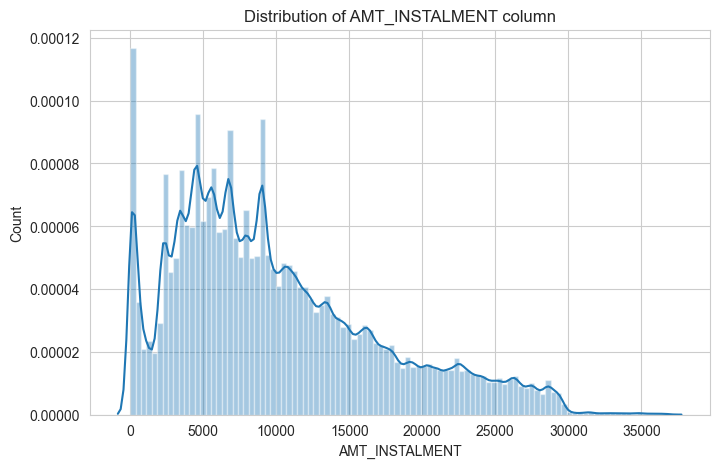

In [103]:
plot_hist(installments_payments, 'AMT_INSTALMENT')

The above plot shows What was the prescribed installment amount of previous credit on this installment, after the removal of the outliers we can see still the majority is 0, and most are less than 30,000.

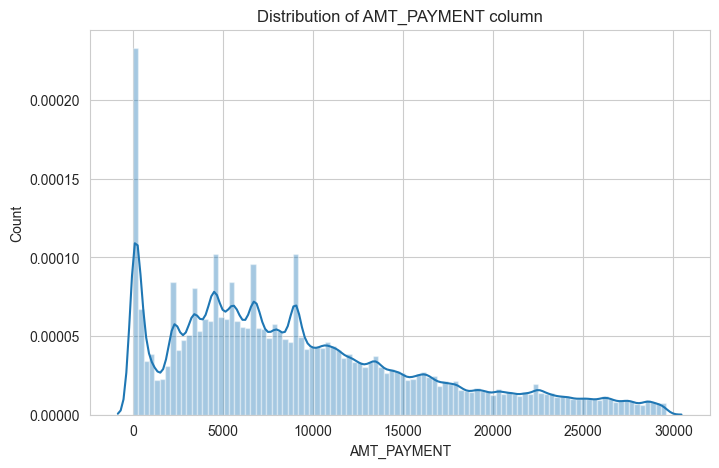

In [104]:
plot_hist(installments_payments, 'AMT_PAYMENT')

What the client actually paid on previous credit on this installment looks like for the majority is 0, and like that of the above most payments are less than 30,000.

In [105]:
installments_payments_agg = aggregate_and_remove(installments_payments, ['NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT'])

Let's do aggragations on the above columns

In [106]:
installments_payments = installments_payments.join(installments_payments_agg, on='SK_ID_CURR', how='inner')

In [107]:
installments_payments = reduce_memory_usage_pl(installments_payments, 'Installments Payments')

Memory usage of dataframe Installments Payments is 558.72 MB
Memory usage of dataframe Installments Payments became 510.55 MB


In [108]:
installments_payments = installments_payments.unique(subset=['SK_ID_CURR'], maintain_order=True)

In [109]:
installments_payments.shape

(331377, 14)

### previous application

In [110]:
previous_application.shape

(1670214, 37)

In [111]:
previous_application.is_duplicated().sum()

0

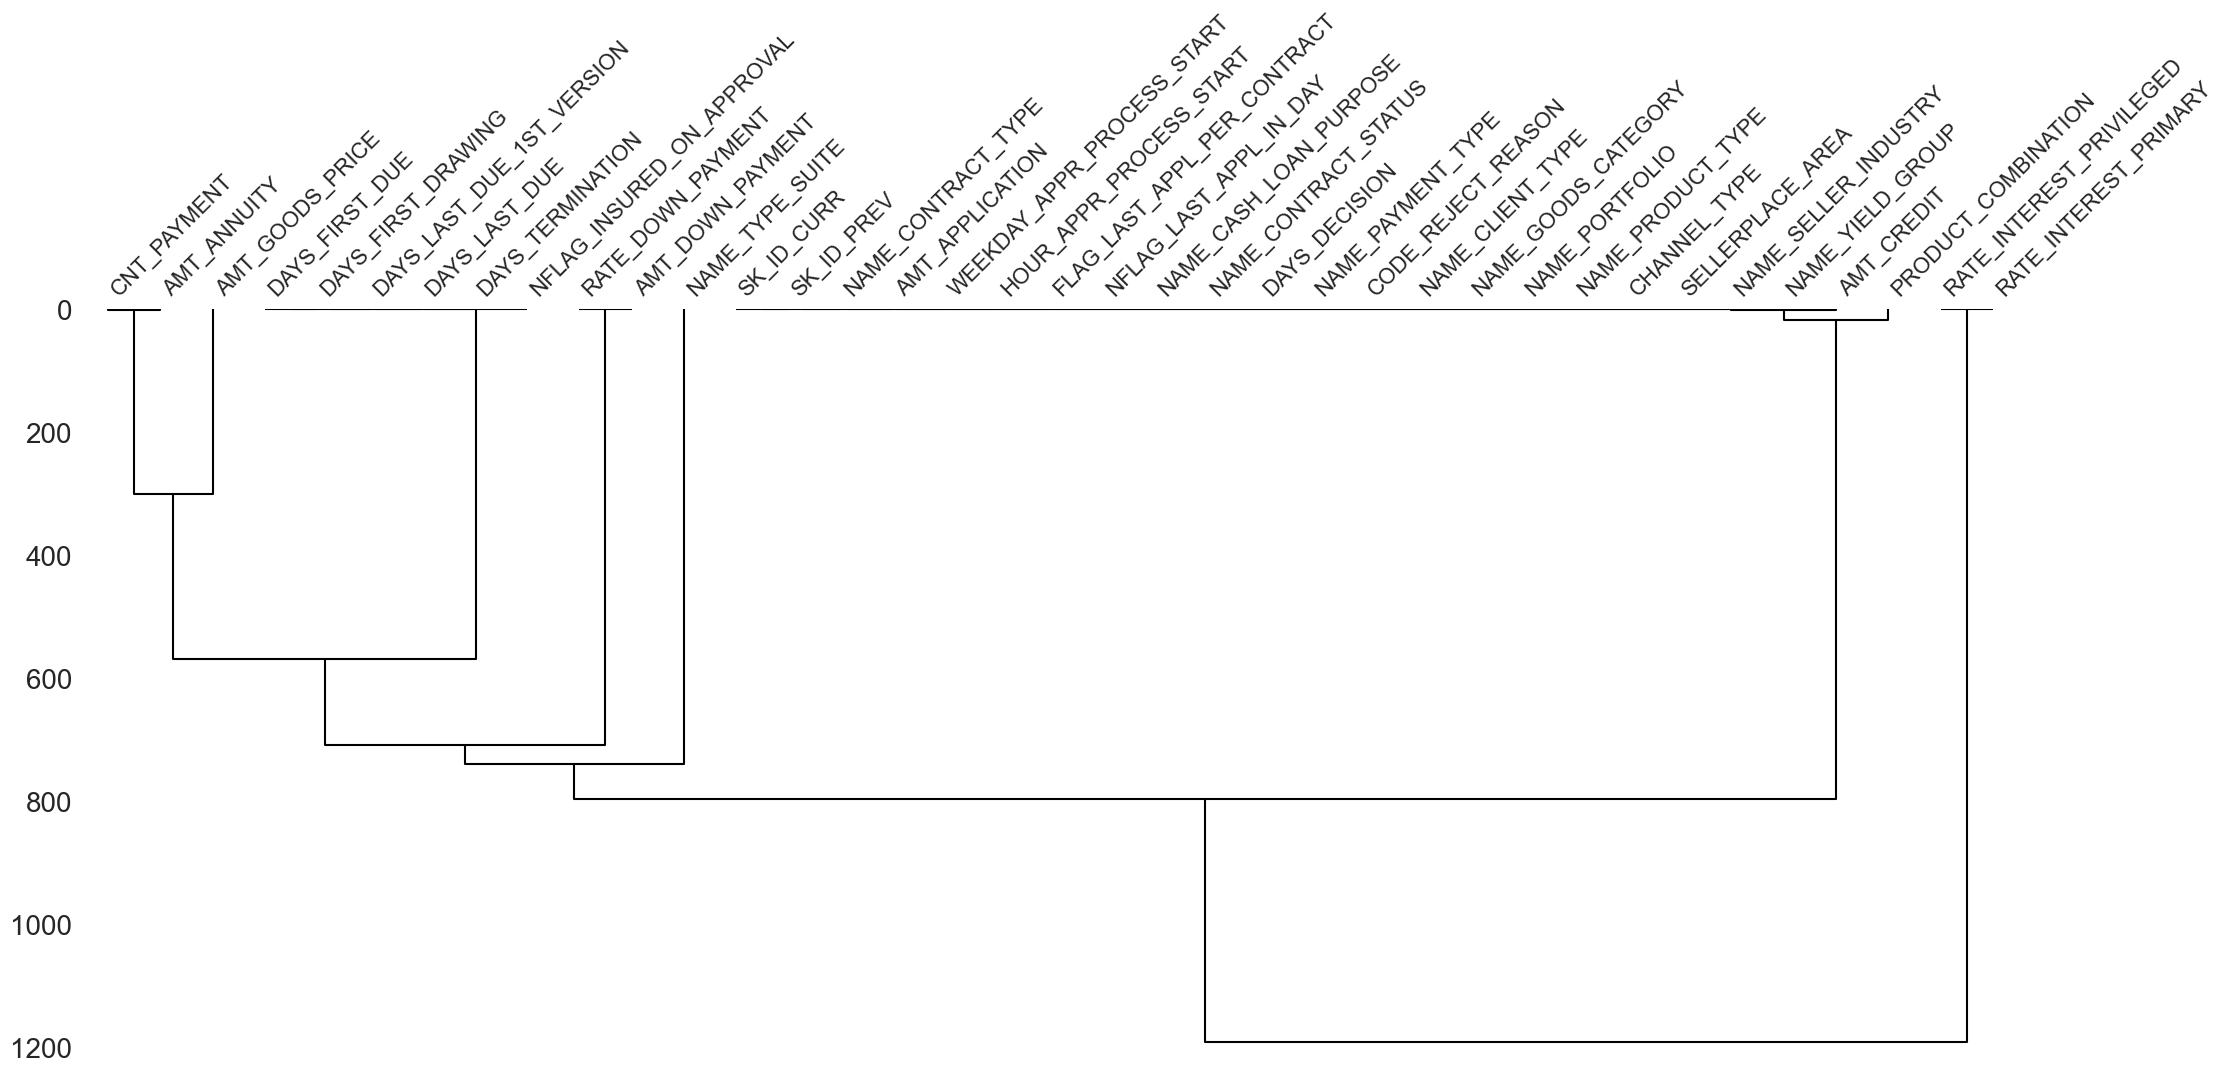

In [112]:
msno.dendrogram(previous_application.to_pandas())
plt.show()

We can see above from the missing values relationship, the highest missing value count containing columns are in some way related to each other.

In [113]:
previous_application_missing = missing_values_table(previous_application)

In [114]:
previous_application_missing.head()

Missing Values,cols,percentages
i64,str,f64
1664263,"""RATE_INTEREST_…",99.643698
1664263,"""RATE_INTEREST_…",99.643698
895844,"""AMT_DOWN_PAYME…",53.63648
895844,"""RATE_DOWN_PAYM…",53.63648
820405,"""NAME_TYPE_SUIT…",49.119754


In [115]:
columns_to_drop = previous_application_missing.filter(pl.col('percentages') >= 50)['cols'].to_list()

In [116]:
previous_application = previous_application.drop(columns_to_drop)

In [117]:
missing_values_table(previous_application).head()

Missing Values,cols,percentages
i64,str,f64
820405,"""NAME_TYPE_SUIT…",49.119754
673065,"""DAYS_FIRST_DRA…",40.298129
673065,"""DAYS_FIRST_DUE…",40.298129
673065,"""DAYS_LAST_DUE_…",40.298129
673065,"""DAYS_LAST_DUE""",40.298129


After dropping the columns with many missing values let's now impute the rest.

In [118]:
numerical_cols_prev = previous_application.select(cs.by_dtype(pl.Int64, pl.Float64, pl.Int32, pl.Float32, pl.Int16, pl.Int8))

In [119]:
fill_by_mean_prev = numerical_cols_prev.fill_null(strategy='mean')

In [120]:
categorical_cols_prev = previous_application.select(cs.string(include_categorical=True))

In [121]:
categorical_cols_prev = categorical_cols_prev.hstack(previous_application[['SK_ID_CURR', 'SK_ID_PREV']])

In [122]:
categorical_cols_prev = categorical_cols_prev.fill_null(value='missing')

In [123]:
previous_application = fill_by_mean_prev.join(categorical_cols_prev, on='SK_ID_CURR', how='inner')
previous_application.head()

SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,SK_ID_PREV_right
i32,i32,f32,f32,f32,f32,i8,i8,i16,i32,f32,f32,f32,f32,f32,f32,f32,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,cat,i32
2030495,271877,1730.430054,17145.0,17145.0,17145.0,15,1,-73,35,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0,"""Consumer loans…","""SATURDAY""","""Y""","""XAP""","""Approved""","""Cash through t…","""XAP""","""missing""","""Repeater""","""Mobile""","""POS""","""XNA""","""Country-wide""","""Connectivity""","""middle""","""POS mobile wit…",2030495
1696966,271877,68258.65625,1.8e6,1.754721e6,1.8e6,18,1,-472,55,36.0,342209.84375,13826.269531,33767.773438,76582.40625,81992.34375,0.33257,"""Consumer loans…","""SATURDAY""","""Y""","""XAP""","""Approved""","""Cash through t…","""XAP""","""missing""","""Repeater""","""Mobile""","""POS""","""XNA""","""Country-wide""","""Connectivity""","""middle""","""POS mobile wit…",2030495
2154916,271877,12417.389648,108400.5,119848.5,108400.5,14,1,-548,196,12.0,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,"""Consumer loans…","""SATURDAY""","""Y""","""XAP""","""Approved""","""Cash through t…","""XAP""","""missing""","""Repeater""","""Mobile""","""POS""","""XNA""","""Country-wide""","""Connectivity""","""middle""","""POS mobile wit…",2030495
2802425,108129,25188.615234,607500.0,679671.0,607500.0,11,1,-164,-1,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0,"""Cash loans""","""THURSDAY""","""Y""","""XNA""","""Approved""","""XNA""","""XAP""","""Unaccompanied""","""Repeater""","""XNA""","""Cash""","""x-sell""","""Contact center…","""XNA""","""low_action""","""Cash X-Sell: l…",2802425
1536272,108129,21709.125,450000.0,512370.0,450000.0,9,1,-515,6,36.0,365243.0,-485.0,565.0,-155.0,-147.0,1.0,"""Cash loans""","""THURSDAY""","""Y""","""XNA""","""Approved""","""XNA""","""XAP""","""Unaccompanied""","""Repeater""","""XNA""","""Cash""","""x-sell""","""Contact center…","""XNA""","""low_action""","""Cash X-Sell: l…",2802425


In [124]:
string_columns = [name for name, dtype in zip(previous_application.columns, previous_application.dtypes) if dtype == pl.Utf8]

In [125]:
previous_application = previous_application.with_columns(
    [pl.col(name).str.replace_all(r'^"(.*?)"$', r'\1').alias(name) for name in string_columns]
)

In [126]:
missing_values_table(previous_application).head()

Missing Values,cols,percentages
i64,str,f64
0,"""SK_ID_PREV""",0.0
0,"""SK_ID_CURR""",0.0
0,"""AMT_ANNUITY""",0.0
0,"""AMT_APPLICATIO…",0.0
0,"""AMT_CREDIT""",0.0


Now we have cleaned all the missing values.

In [ ]:
previous_application = remove_outlier(previous_application)

In [128]:
previous_application.shape

(4733212, 34)

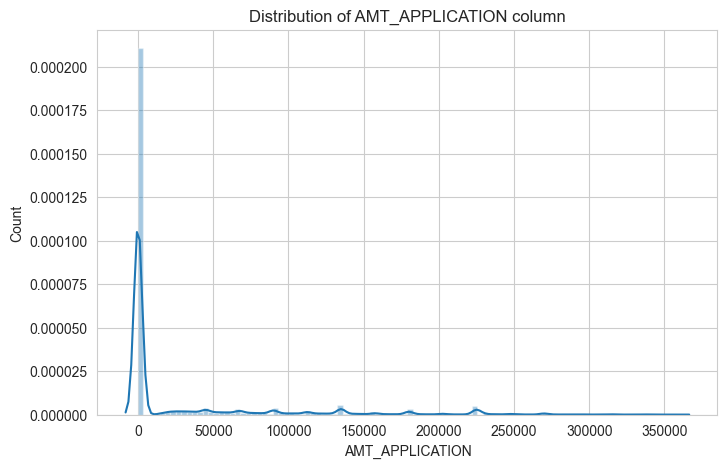

In [129]:
plot_hist(previous_application, 'AMT_APPLICATION')

Looking at For how much credit did client ask on the previous application, most of them have asked for nothing, and all of them were less than 350,000 after outlier removal.

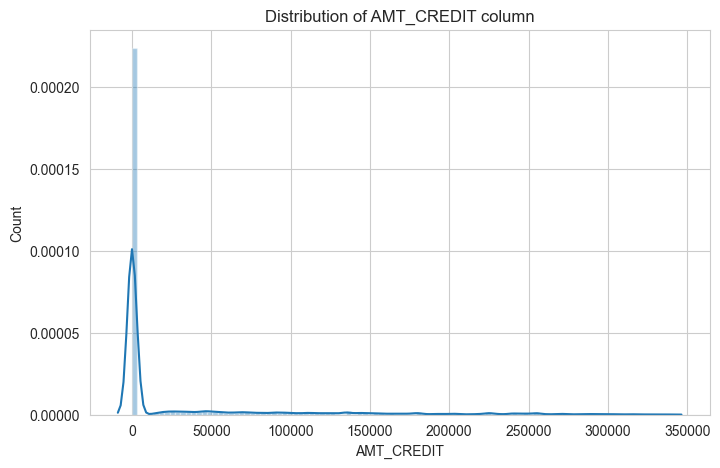

In [130]:
plot_hist(previous_application, 'AMT_CREDIT')

The above plot shows the Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT, we still see that majority have a value 0.

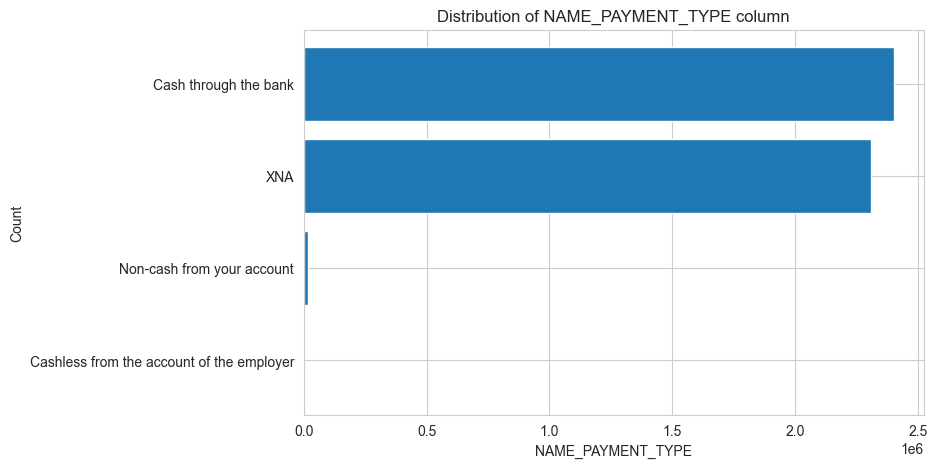

In [131]:
plot_horizontal_bar(previous_application, 'NAME_PAYMENT_TYPE')

The above bar plot shows the Payment method that client chose to pay for the previous application. Majority of the clients have paid with Cash through bank, and XNA is actually an indication of a NA value in the data.

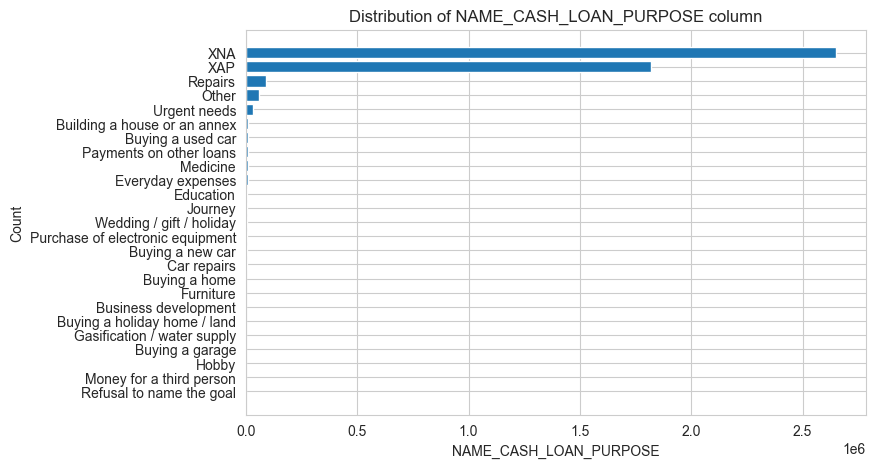

In [132]:
plot_horizontal_bar(previous_application, 'NAME_CASH_LOAN_PURPOSE')

For the loan purpose as well XNA and XAP actually indicate NA values still so majority of them haven't been provided that means. But other than that the most common reason is for repairs.

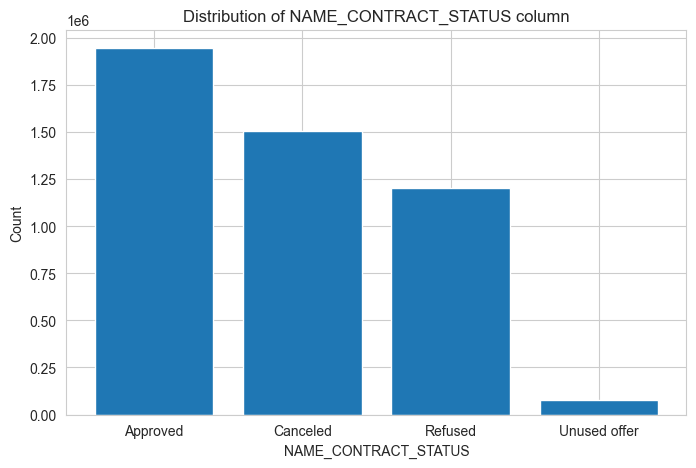

In [133]:
plot_bar(previous_application, 'NAME_CONTRACT_STATUS')

For the contract status of the previos applocation we see that majority of them have been approved.

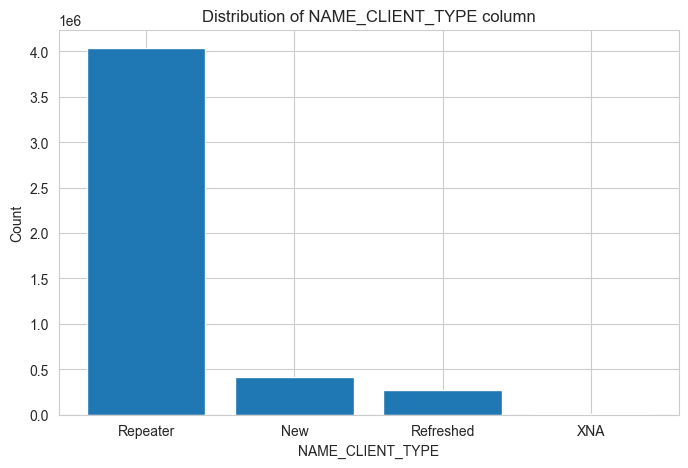

In [134]:
plot_bar(previous_application, 'NAME_CLIENT_TYPE')

The above plot tells us if the client was old or new client when applying for the previous application. We can see most are repeaters.

In [135]:
previous_application_agg = aggregate_and_remove(previous_application, ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'DAYS_DECISION', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'])

Let's do aggregations.

In [136]:
previous_application = previous_application.join(previous_application_agg, on='SK_ID_CURR', how='inner')

In [137]:
previous_application = previous_application.unique(subset=['SK_ID_CURR'], maintain_order=True)

In [138]:
previous_application = reduce_memory_usage_pl(previous_application, 'previous_application')

Memory usage of dataframe previous_application is 30.32 MB
Memory usage of dataframe previous_application became 28.67 MB


In [139]:
previous_application.shape

(172772, 46)

### POS Cash Balance

In [140]:
pos_cash_balance.shape

(10001358, 8)

In [141]:
pos_cash_balance.is_duplicated().sum()

0

In [142]:
missing_values_table(pos_cash_balance)

Missing Values,cols,percentages
i64,str,f64
26087,"""CNT_INSTALMENT…",0.260835
26071,"""CNT_INSTALMENT…",0.260675
0,"""SK_ID_PREV""",0.0
0,"""SK_ID_CURR""",0.0
0,"""MONTHS_BALANCE…",0.0
0,"""NAME_CONTRACT_…",0.0
0,"""SK_DPD""",0.0
0,"""SK_DPD_DEF""",0.0


We don't have too many missing values here.

In [143]:
numerical_cols_pos = pos_cash_balance.select(cs.by_dtype(pl.Int64, pl.Float64, pl.Int32, pl.Float32, pl.Int16, pl.Int8))

In [144]:
fill_by_mean_pos = numerical_cols_pos.fill_null(strategy='mean')

In [145]:
categorical_cols_pos = pos_cash_balance.select(cs.string(include_categorical=True))

In [146]:
categorical_cols_pos = categorical_cols_pos.fill_null(value='missing')

In [147]:
pos_cash_balance = fill_by_mean_pos.hstack(categorical_cols_pos)
pos_cash_balance.head()

SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS
i32,i32,i8,f32,f32,i16,i16,cat
1803195,182943,-31,48.0,45.0,0,0,"""Active"""
1715348,367990,-33,36.0,35.0,0,0,"""Active"""
1784872,397406,-32,12.0,9.0,0,0,"""Active"""
1903291,269225,-35,48.0,42.0,0,0,"""Active"""
2341044,334279,-35,36.0,35.0,0,0,"""Active"""


In [148]:
string_columns = [name for name, dtype in zip(previous_application.columns, previous_application.dtypes) if dtype == pl.Utf8]

In [149]:
pos_cash_balance = pos_cash_balance.with_columns(
    [pl.col(name).str.replace_all(r'^"(.*?)"$', r'\1').alias(name) for name in string_columns]
)

In [150]:
pos_cash_balance = remove_outlier(pos_cash_balance)

Number of outliers in MONTHS_BALANCE column is 0
Outlier removed dataframe shape: (10001358, 8)
Outlier removed dataframe shape: (10001358, 8)
----------------------------------------------
Number of outliers in CNT_INSTALMENT column is 498724
Outlier removed dataframe shape: (9502634, 8)
Outlier removed dataframe shape: (9502634, 8)
----------------------------------------------
Number of outliers in CNT_INSTALMENT_FUTURE column is 479679
Outlier removed dataframe shape: (9022955, 8)
Outlier removed dataframe shape: (9022955, 8)
----------------------------------------------
Number of outliers in SK_DPD column is 286175
Outlier removed dataframe shape: (8736780, 8)
Outlier removed dataframe shape: (8736780, 8)
----------------------------------------------
Number of outliers in SK_DPD_DEF column is 0
Outlier removed dataframe shape: (8736780, 8)
Outlier removed dataframe shape: (8736780, 8)
----------------------------------------------


In [151]:
pos_cash_balance_agg = aggregate_and_remove(pos_cash_balance, ['MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF'])

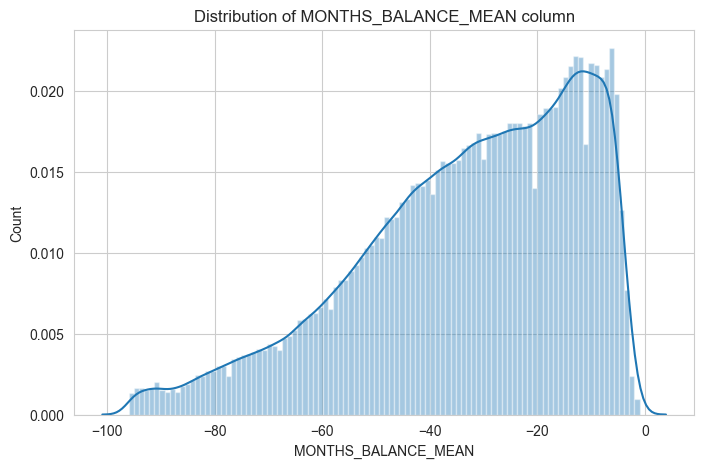

In [152]:
plot_hist(pos_cash_balance_agg, 'MONTHS_BALANCE_MEAN')

When looking at the Month of balance relative to application date most have applied in a very little interval from the previous application.

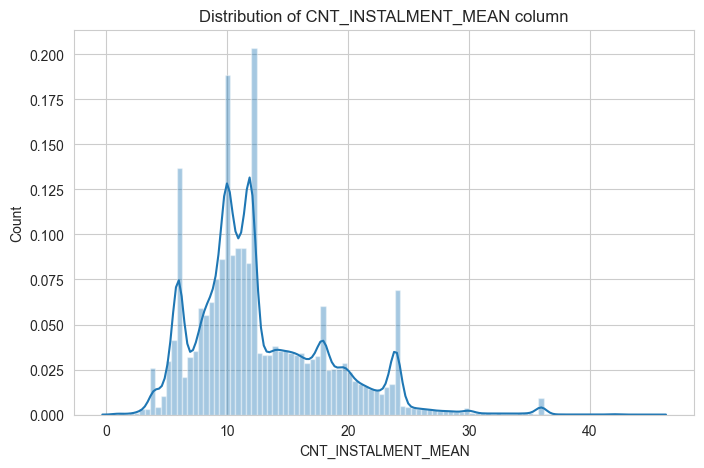

In [153]:
plot_hist(pos_cash_balance_agg, 'CNT_INSTALMENT_MEAN')

Look at Term of previous credit majority are found in the proximityof 10.

In [154]:
pos_cash_balance = pos_cash_balance.join(pos_cash_balance_agg, on='SK_ID_CURR', how='inner')

In [155]:
pos_cash_balance = pos_cash_balance.unique(subset=['SK_ID_CURR'], maintain_order=True)

In [156]:
pos_cash_balance = reduce_memory_usage_pl(pos_cash_balance, 'pos_cash_balance')

Memory usage of dataframe pos_cash_balance is 18.28 MB
Memory usage of dataframe pos_cash_balance became 13.79 MB


In [157]:
pos_cash_balance.shape

(336224, 13)

## Hypothesis Testing

In [158]:
from scipy import stats
from scipy.stats import chi2_contingency

In [159]:
application_train_hyp = application_train.to_pandas()

- Null Hypothesis (H0): There is no significant difference in the income between customers who default on loans and those who do not.

- Alternative Hypothesis (H1): There is a significant difference in the income between customers who default on loans and those who do not.

In [160]:
default_group = application_train_hyp[application_train_hyp['TARGET'] == 1]['AMT_INCOME_TOTAL']
non_default_group = application_train_hyp[application_train_hyp['TARGET'] == 0]['AMT_INCOME_TOTAL']

t_stat, p_value = stats.ttest_ind(default_group, non_default_group, equal_var=False)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in income.")
else:
    print("Fail to reject the null hypothesis: No significant difference in income.")

Fail to reject the null hypothesis: No significant difference in income.


- Null Hypothesis (H0): There is no association between a customer's education level and loan default.

- Alternative Hypothesis (H1): There is an association between a customer's education level and loan default.

In [161]:
contingency_table = pd.crosstab(application_train_hyp['NAME_EDUCATION_TYPE'], application_train_hyp['TARGET'])

chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is an association between education level and loan default.")
else:
    print("Fail to reject the null hypothesis: No significant association.")

Reject the null hypothesis: There is an association between education level and loan default.


- Null Hypothesis (H0): There is no association between a customer's family status and loan default.

- Alternative Hypothesis (H1): There is an association between a customer's family status and loan default.

In [162]:
contingency_table = pd.crosstab(application_train_hyp['NAME_FAMILY_STATUS'], application_train_hyp['TARGET'])

chi2, p, _, _ = chi2_contingency(contingency_table)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is an association between family status and loan default.")
else:
    print("Fail to reject the null hypothesis: No significant association.")

Reject the null hypothesis: There is an association between family status and loan default.


- Null Hypothesis (H0): There is no significant difference in credit scores between customers who default on loans and those who do not.

- Alternative Hypothesis (H1): There is a significant difference in credit scores between customers who default on loans and those who do not.

In [163]:
default_group = application_train_hyp[application_train_hyp['TARGET'] == 1]['EXT_SOURCE_3'].dropna()
non_default_group = application_train_hyp[application_train_hyp['TARGET'] == 0]['EXT_SOURCE_3'].dropna()

t_stat, p_value = stats.ttest_ind(default_group, non_default_group, equal_var=False)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in credit scores.")
else:
    print("Fail to reject the null hypothesis: No significant difference in credit scores.")

Reject the null hypothesis: There is a significant difference in credit scores.


## Data Preparation

Below I will be merging the rest of the tables with the dedicated application train and application test tables for better modelling.

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
bureau_merge_train, bureau_merge_test = train_test_split(bureau_merge, test_size=0.3, random_state=42)
installments_payments_train, installments_payments_test = train_test_split(installments_payments, test_size=0.3, random_state=42)
credit_card_balance_train, credit_card_balance_test = train_test_split(credit_card_balance, test_size=0.3, random_state=42)
previous_application_train, previous_application_test = train_test_split(previous_application, test_size=0.3, random_state=42)
pos_cash_balance_train, pos_cash_balance_test = train_test_split(pos_cash_balance, test_size=0.3, random_state=42)

#### Merge to train

In [166]:
merge_df = bureau_merge_train.join(installments_payments_train, on='SK_ID_CURR', how='left')

In [167]:
merge_df = merge_df.join(credit_card_balance_train, on='SK_ID_CURR', how='left')

In [168]:
def check_duplicates(df1, df2):    
    c1 = df1.columns
    c2 = df2.columns

    duplicates = []
    for col1 in c1:
        if col1 in c2:
            duplicates.append(col1)

    return duplicates

In [169]:
check_duplicates(merge_df, previous_application_train)

['SK_ID_CURR', 'SK_ID_PREV', 'SK_ID_PREV_right', 'NAME_CONTRACT_STATUS']

In [170]:
previous_application_train = previous_application_train.drop('SK_ID_PREV')
previous_application_train = previous_application_train.drop('SK_ID_PREV_right')

In [171]:
mapping = {
    'NAME_CONTRACT_STATUS': 'NAME_CONTRACT_STATUS_x',
}
previous_application_train = previous_application_train.rename(mapping)

In [172]:
merge_df = merge_df.join(previous_application_train, on='SK_ID_CURR', how='left')

In [173]:
check_duplicates(merge_df, pos_cash_balance_train)

['SK_ID_CURR',
 'MONTHS_BALANCE_MEAN',
 'SK_ID_PREV',
 'MONTHS_BALANCE',
 'NAME_CONTRACT_STATUS',
 'SK_DPD',
 'SK_DPD_DEF',
 'SK_DPD_MEAN']

In [174]:
pos_cash_balance_train = pos_cash_balance_train.drop('SK_ID_PREV')

In [175]:
mapping = {"MONTHS_BALANCE_MEAN": "MONTHS_BALANCE_MEAN_pos",
           "SK_DPD_MEAN": "SK_DPD_MEAN_pos",
           "SK_DPD_DEF": "SK_DPD_DEF_pos",
           "MONTHS_BALANCE": "MONTHS_BALANCE_pos",
           "NAME_CONTRACT_STATUS": "NAME_CONTRACT_STATUS_pos",
           "SK_DPD": "SK_DPD_pos",
           }
pos_cash_balance_train = pos_cash_balance_train.rename(mapping)

In [176]:
merge_df  = merge_df.join(pos_cash_balance_train, on='SK_ID_CURR', how='left')

In [177]:
merge_df = application_train.join(merge_df, on='SK_ID_CURR', how='left')

In [ ]:
missing_vals = missing_values_table(merge_df)

In [ ]:
columns_to_drop = missing_vals.filter(pl.col('percentages') >= 50)['cols'].to_list()

In [ ]:
merge_df = merge_df.drop(columns_to_drop)

In [ ]:
numerical_cols_merge = merge_df.select(cs.by_dtype(pl.Int64, pl.Float64, pl.Int32, pl.Float32, pl.Int16, pl.Int8))

In [ ]:
fill_by_mean_test = numerical_cols_merge.fill_null(strategy='mean')

In [ ]:
categorical_cols_merge = merge_df.select(cs.string(include_categorical=True))

In [ ]:
categorical_cols_merge = categorical_cols_merge.fill_null(value='missing')

In [ ]:
merge_df = fill_by_mean_test.hstack(categorical_cols_merge)

In [ ]:
merge_df.write_csv('../data/trains.csv')

#### Merge to test

In [ ]:
test = bureau_merge_test.join(installments_payments_test, on='SK_ID_CURR', how='left')

In [ ]:
test = test.join(credit_card_balance_test, on='SK_ID_CURR', how='left')

In [ ]:
previous_application_test = previous_application_test.drop('SK_ID_PREV')
previous_application_test = previous_application_test.drop('SK_ID_PREV_right')

In [ ]:
test = test.join(previous_application_test, on='SK_ID_CURR', how='left')

In [ ]:
mapping = {"MONTHS_BALANCE": "MONTHS_BALANCE_pos",
           "NAME_CONTRACT_STATUS": "NAME_CONTRACT_STATUS_pos",
           "SK_DPD": "SK_DPD_pos",
           "SK_DPD_DEF": "SK_DPD_DEF_pos"
           }

In [ ]:
pos_cash_balance_test = pos_cash_balance_test.rename(mapping=mapping)

In [ ]:
pos_cash_balance_test = pos_cash_balance_test.drop('SK_ID_PREV')

In [ ]:
test = test.join(pos_cash_balance_test, on='SK_ID_CURR', how='left')

In [ ]:
test = application_test.join(test, on='SK_ID_CURR', how='left')

In [ ]:
columns_to_drop.remove('MONTHS_BALANCE_MEAN_pos')
columns_to_drop.remove('SK_DPD_MEAN_pos')
columns_to_drop.remove('NAME_CONTRACT_STATUS_x')

In [ ]:
test = test.drop(columns_to_drop)

In [ ]:
test = test.drop(['MONTHS_BALANCE_MEAN_right','NAME_CONTRACT_STATUS_right','SK_DPD_MEAN_right'])

In [ ]:
numerical_cols_test = test.select(cs.by_dtype(pl.Int64, pl.Float64, pl.Int32, pl.Float32, pl.Int16, pl.Int8))

In [ ]:
fill_by_mean_test = numerical_cols_test.fill_null(strategy='mean')

In [ ]:
categorical_cols_test = test.select(cs.string(include_categorical=True))

In [ ]:
categorical_cols_test = categorical_cols_test.fill_null(value='missing')

In [ ]:
test = fill_by_mean_test.hstack(categorical_cols_test)

In [ ]:
test.write_csv('../data/test.csv')

## Summary

In the above notebook I have tried to explore the given dataset. With my exploration I have managed to get some insights on the different features that are there. In addition to exploration I have also done extesnive data cleaning by handling both outliers and missing values in the data. At the end I have exported the cleaned datasets to the next notebook which is for modelling. So let's move on to the next notebook.